### **Section 1 - Initialization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display 

### **Section 2 - Load Data**

In [2]:
data_files_games = pd.read_csv('datasets/games.csv')
display(data_files_games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
print(data_files_games.shape)

data_files_games.info()

(16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### **Section 2.1 Preliminary Data Cleaning**<br>
**Quantifying missing values in each column to identify data quality issues after initial inspection.**

In [4]:
data_files_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Reviewing and Handling Missing Values in `Name` and `Genre` Columns Further 
  - **While seemingly nominal, these two rows affect counting functions and summary statistics. The goal is to evaluate their impact on the overall dataset and determine whether retaining or excluding them will lead to a more accurate analysis.**

In [5]:
data_files_games[data_files_games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Following review of `Name` and `Genre` column:**<br>
- Missing values were replaced with 'Unknown' rather than deleting the rows since the `Name` and `Genre` columns are essential for proper categorization. 
- This approach maintains data integrity while preserving all records for a more complete analysis.<br>

**Additionally, reviewing rows 659 and 14244 revealed that while one row contributes meaningfully to overall sales analysis, the other is only relevant for JP_sales**
- **Filtering GEN platform games should help assess the scale of JP_sales more closely.**

In [6]:
gen_games = (
    data_files_games[data_files_games['Platform'] == 'GEN']
    .set_index(['Platform', 'Year_of_Release'])
    .sort_values(by=['Year_of_Release', 'Name'])
)

display(gen_games)

Name  \
Platform Year_of_Release                                                      
GEN      1990.0                                             Streets of Rage   
         1991.0                                          Sonic the Hedgehog   
         1992.0                                            Ecco the Dolphin   
         1992.0                                              Gunstar Heroes   
         1992.0                                               Mortal Kombat   
         1992.0                                                     NBA Jam   
         1992.0                                        Sonic the Hedgehog 2   
         1992.0                Street Fighter II': Special Champion Edition   
         1993.0                                                Beyond Oasis   
         1993.0                                             Dynamite Headdy   
         1993.0                                     Ecco: The Tides of Time   
         1993.0                                            Shining Force II   
         1993.0           Street Fighter II': Special Champion Edition (...   
         1993.0                                           Streets of Rage 3   
         1993.0                                     Super Street Fighter II   
         1993.0                                                         NaN   
         1993.0                                                         NaN   
         1994.0                                      Castlevania Bloodlines   
         1994.0                                      Disney's The Lion King   
         1994.0                         Dragon Slayer: The Legend of Heroes   
         1994.0                                      J-League Pro Striker 2   
         1994.0              Lunar 2: Eternal Blue(sales, but wrong system)   
         1994.0                                             Mortal Kombat 3   
         1994.0                                  NBA Jam Tournament Edition   
         1994.0                                     Puzzle & Action: Tant-R   
         1994.0                                            Sonic & Knuckles   
         1994.0                                        Sonic the Hedgehog 3   
         1994.0                                               Virtua Racing   
         1994.0                            Yuu Yuu Hakusho: Makyo Toitsusen   

                                 Genre  NA_sales  EU_sales  JP_sales  \
Platform Year_of_Release                                               
GEN      1990.0                 Action      1.86      0.55      0.11   
         1991.0               Platform      3.03      0.91      0.26   
         1992.0              Adventure      0.00      0.00      0.12   
         1992.0                Shooter      0.00      0.00      0.13   
         1992.0               Fighting      1.95      0.63      0.00   
         1992.0                 Sports      1.75      0.25      0.00   
         1992.0               Platform      4.47      1.20      0.16   
         1992.0               Fighting      1.00      0.30      0.31   
         1993.0           Role-Playing      0.00      0.00      0.05   
         1993.0               Platform      0.00      0.00      0.05   
         1993.0              Adventure      0.00      0.00      0.07   
         1993.0               Strategy      0.00      0.00      0.19   
         1993.0                 Action      0.00      0.00      0.07   
         1993.0                 Action      0.00      0.00      0.07   
         1993.0               Fighting      0.00      0.00      0.15   
         1993.0                    NaN      1.78      0.53      0.00   
         1993.0                    NaN      0.00      0.00      0.03   
         1994.0               Platform      0.00      0.00      0.04   
         1994.0               Platform      0.97      0.37      0.03   
         1994.0           Role-Playing      0.00      0.00      0.08   
         1994.0                 Sport

- The initial review was not as helpful as expected due to many cells with 0 values
- Assessing snapshot of values =>1 only to better gauge the data

In [7]:
display(data_files_games[data_files_games['JP_sales'] > 0])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


### **Section 2.2 Missing Values Handling Before Data Cleaning**<br>

- This dataset contains 22,318 missing values. While the exact cause is unknown, possible explanations include data deletion during processing or incomplete information collection during initial entry.
- Rows 669 and 14244 each contain one missing value—one in the `Name` column and one in the `Genre` column. Both missing values will be replaced with 'Unknown'.
- Row 14,244 contains data in the `Year_of_Release`, `GEN`, and `JP_sales` columns and will be retained, as it offers potentially valuable insights for Japan-specific sales analysis. 
- The missing 8,578 values in `critic_score` and 6,701 in `user_score` will be filled with their respective column medians during the cleaning process.<br>
- The 6,766 missing values in the `Rating` column will be replaced with 'Unknown'.
- The 269 missing values in `Year_of_Release` will be replaced with 0s.

### **Key Improvements**
- Enhanced Clarity – 'Unknown' clearly conveys missing data in all outputs, improving reviewer understanding.
- Reliable Aggregation – Enables accurate summing, counting, and averaging without missing values skewing results.
- Chronological Analysis  – Replacing missing 'year_of_release' values with 0s allows for chronological sorting while making these entries easily identifiable in time-based analyses.

In [8]:
data_files_games[['Name', 'Genre', 'Rating']] = data_files_games[['Name', 'Genre', 'Rating']].fillna('Unknown')

### **Section 3 - Data Cleaning and Standardization Recommendations**

### **The Games dataset consists of 16,715 rows and 11 columns:** 
- Numerical `float64`<br>
`Year_of_Release`(e.g.,2006.0)<br>
`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales` (e.g., 0.00 - 2.43)<br>
`Critic_Score`(e.g., 58.0 - 89.0)<br>
<br>
- Categorical `object`<br>
`Name`, `Platform`, `Genre`, `User_Score`, `Rating`

### **Potential Data Type Issues & Fixes**
| Column | Issue | Suggested Fix |
|---------|--------|--------------|
| **Column Formatting** | Inconsistent casing, extra spaces, or special characters in column names | Convert to lowercase, strip spaces, and replace spaces with underscores, where necessary (e.g., `Year_of_Release` → `year_of_release`) |
| **`Year_of_Release`** | Stored as `float64`, 0 serves as whole number value | Convert to `int64` |
| **`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`, `Critic_Score`** | Stored as `float64` with unnecessary decimals | Convert to `int64` |
| **`User_Score`** | Stored as `object`, containing both integers and floats | Convert to `float64`, then `int64` if no decimals remain |
| **`Genre` and `Rating`** | Stored as `object` | Convert to `category` for memory efficiency |



### **Key Improvements**
- Lowercase Formatting – Ensures consistency, improves readability, and facilitates automation
- Missing Value Strategy – Inserting zeros for `Year_of_Release` prevents misplacing games in incorrect console generations, unlike median imputation
- Data Integrity – Ensures numbers are accurately represented without unnecessary decimals
- Memory Optimization – Converting `Genre` and `Rating` to `category`to reduces memory storage
- Enhance Analysis – Numeric columns in the correct format enable more precise calculations

**Standardize column names, stripe spaces and add underscores**

In [9]:
data_files_games.columns = data_files_games.columns.str.lower().str.strip().str.replace(' ', '_')

**Checking a sample of the dataset after column formatting adjustments**

In [10]:
data_files_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13215,Rogue Ops,GC,2003.0,Action,0.04,0.01,0.0,0.00,65.0,tbd,M
11422,NHL 06,GC,2005.0,Sports,0.06,0.02,0.0,0.00,78.0,9.3,E10+
15440,Demolition Company: Gold Edition,PC,2011.0,Simulation,0.00,0.02,0.0,0.00,NaN,tbd,Unknown
12094,Strike Point,PS,1996.0,Simulation,0.04,0.03,0.0,0.00,NaN,NaN,Unknown
1032,Crash Bandicoot: The Huge Adventure,GBA,2002.0,Platform,0.95,0.70,0.0,0.08,78.0,7.9,E


**Convert Year_of_Release to int (removing 0)**

In [11]:
data_files_games['year_of_release'] = data_files_games['year_of_release'].fillna(0).astype(int)

**Round sales values and convert to int**
- Define all_sales_columns

In [12]:
all_sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

**Rounding and converting each sales column to integers for consistency.**

In [13]:
data_files_games[all_sales_columns] = data_files_games[all_sales_columns].apply(lambda x: x.round().astype(int))

### **Notable Differences Between `critic_score` and `user_score`**
| Column        | Scale   | Range       | Typical Values  |
|--------------|--------|------------|----------------|
| `critic_score` | 0 - 100 | Large integers | e.g., `82.0`, `72.0` |
| `user_score`  | 0 - 10  | Small decimals | e.g., `8.0`, `6.6`  |

- `critic_score` uses a 0-100 scale, similar to a grading system.
- `user_score` uses a 0-10 scale, typically allowing decimals
  - This column also contains "tbd" values which will be replaced with `NaN` to enable proper conversion to `float64`.

In [14]:
print(data_files_games['user_score'].value_counts(dropna=False).to_string())
print(data_files_games['critic_score'].value_counts(dropna=False).to_string())

user_score
NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.6      72
5.4      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.5      34
4.1      33
4.4      33
9.3      31
3.8      28
4.2      28
4        27
3.5      26
2.8      24
4.7      24
3.4      23
3.1      23
3        21
3.6      20
3.7      19
3.3      15
3.9      13
3.2      13
2.5      12
2        11
2.4      11
9.4      11
1.7       9
2.9       9
2.1       9
2.7       8
2.2       6
1.8       6
9.5       6
1.4       5
2.6       4
1.6       3
1.2       3
2.3  

**Managing "tbd" Entries and Rating Conversion**
- "tbd" values are confirmed to be in `user_score` column only. These values will be replaced with `Nan` to enable proper numeric conversion.

In [15]:
data_files_games['user_score'] = data_files_games['user_score'].replace('tbd', np.nan)

**Convert both columns to `floate64`, rounding to one decimal place for consistency.**

In [16]:
data_files_games['critic_score'] = data_files_games['critic_score'].astype(float).round(1)
data_files_games['user_score'] = data_files_games['user_score'].astype(float).round(1)

**Filling missing values with 0 for analysis**

In [17]:
data_files_games['critic_score'] = data_files_games['critic_score'].fillna(0)
data_files_games['user_score'] = data_files_games['user_score'].fillna(0)

**Replace 0 values with the column-specific median (excluding 0s from the calculation).**

In [18]:
median_critic_score = data_files_games.loc[data_files_games['critic_score'] != 0, 'critic_score'].median()
median_user_score = data_files_games.loc[data_files_games['user_score'] != 0, 'user_score'].median()

data_files_games['critic_score'].replace(0, median_critic_score, inplace=True)
data_files_games['user_score'].replace(0, median_user_score, inplace=True)

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2418214430.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_files_games['critic_score'].replace(0, median_critic_score, inplace=True)
C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2418214430.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

**Checking the number of unique `genres`, `platforms`, and `ratings` in the dataset to determine if conversion to category datatype is beneficial**

In [19]:
display(data_files_games['platform'].value_counts())

unique_platforms = data_files_games['platform'].nunique()
print(f"Unique Platforms Count: {unique_platforms}")

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Unique Platforms Count: 31


In [20]:
display(data_files_games['genre'].value_counts())

unique_genres = data_files_games['genre'].nunique()
print(f"Unique Genres Count: {unique_genres}")

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Unknown            2
Name: count, dtype: int64

Unique Genres Count: 13


In [21]:
display(data_files_games['rating'].value_counts())

unique_genres = data_files_games['rating'].nunique()
print(f"Unique Ratings Count: {unique_genres}")

rating
Unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: count, dtype: int64

Unique Ratings Count: 9


In [22]:
unique_game_names = data_files_games['name'].nunique()
print(f"Unique Game Names Count: {unique_game_names}")

Unique Game Names Count: 11560


**Given the presence of 31 unique platforms, 13 unique genres, and 9 unique ratings, converting these columns to the `category` data type is beneficial as it improves efficiency by:**
 - Memory Optimization – Storeing values as compact integer-based categories rather than full strings.
 - Performance Enhancement – Accelerating sorting, filtering, and grouping operations.
 - Data Integrity – Limiting columns to predefined categories, preventing invalid entries.

 **Keeping the `name` column as `object` data type is best becasue:**
 - Memory Efficiency – Storing unique values as object prevents unnecessary category overhead.
 - Performance Considerations – Categories provide benefits primarily for repeated values, not unique names.
 - Flexibility – Allows addition of new game titles without requiring category definition updates.

In [23]:
data_files_games['genre'] = data_files_games['genre'].astype('category')
data_files_games['platform'] = data_files_games['platform'].astype('category')
data_files_games['rating'] = data_files_games['rating'].astype('category')

**Checking the dataset to confirm successful data cleaning**

In [24]:
display(data_files_games.info())
data_files_games.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16715 non-null  int64   
 3   genre            16715 non-null  category
 4   na_sales         16715 non-null  int64   
 5   eu_sales         16715 non-null  int64   
 6   jp_sales         16715 non-null  int64   
 7   other_sales      16715 non-null  int64   
 8   critic_score     16715 non-null  float64 
 9   user_score       16715 non-null  float64 
 10  rating           16715 non-null  category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 1.1+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,0,0,71.0,7.5,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0,0,0,0,71.0,7.5,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,0,0,71.0,7.5,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0,0,0,0,71.0,7.5,Unknown
16714,Winning Post 8 2016,PSV,2016,Simulation,0,0,0,0,71.0,7.5,Unknown


**Identifying cells with nulls values**

In [25]:
data_files_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Identifying rows with missing values**

In [26]:
data_files_games[data_files_games.isna().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**identifying duplicate values or rows**

In [27]:
data_files_games.duplicated().sum()

np.int64(0)

**Identifying duplicate game entries across platforms**

In [28]:
print(data_files_games.duplicated(subset=['name', 'platform']).sum())

game_duplicates = data_files_games[data_files_games.duplicated(subset=['name', 'platform'], keep=False)]
game_duplicates = game_duplicates.sort_values(by=['name', 'platform'])
display(game_duplicates)

5


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2,0,0,0,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0,0,0,0,83.0,5.5,E
5972,Need for Speed: Most Wanted,PC,2005,Racing,0,0,0,0,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0,0,0,0,82.0,8.5,T
1190,Need for Speed: Most Wanted,X360,2012,Racing,1,1,0,0,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1,0,0,0,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0,0,0,1,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,0,Platform,0,0,0,0,43.0,4.1,E10+
659,Unknown,GEN,1993,Unknown,2,1,0,0,71.0,7.5,Unknown
14244,Unknown,GEN,1993,Unknown,0,0,0,0,71.0,7.5,Unknown


**Duplicate Row Identification and Removal**

| **Row_Index** | Reason for Removal |
| ------------- | ------------------ |
| 16230 | Exact duplicate of row 604. Same game, platform, year, scores, and sales. Keeping both would inflate counts. |
| 4127 | Exact duplicate of row 1745. Identical in all key columns. Removing avoids double-counting. |
| 14244 | Identical to row 659, including missing name and genre. No unique information provided. |

<br>

**Key Improvements** <br>
- Enhanced Data Integrity – Removal of redundant entries ensures accurate sales figures, game counts, and platform statistics.
- Prevented Data Inflation – Eliminated double-counting of identical game-platform combinations.
- Improved Dataset Clarity – Reduced noise for more reliable downstream analysis of revenue trends, platform popularity, and other metrics.

In [29]:
data_files_games = data_files_games.drop(index=[16230, 4127, 14244])

In [30]:
data_files_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16712 non-null  object  
 1   platform         16712 non-null  category
 2   year_of_release  16712 non-null  int64   
 3   genre            16712 non-null  category
 4   na_sales         16712 non-null  int64   
 5   eu_sales         16712 non-null  int64   
 6   jp_sales         16712 non-null  int64   
 7   other_sales      16712 non-null  int64   
 8   critic_score     16712 non-null  float64 
 9   user_score       16712 non-null  float64 
 10  rating           16712 non-null  category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 1.2+ MB


**Reassessing unique platform counts to analyze distribution, evaluate the impact on analysis, and determine whether to remove rare platforms or highlight dominant ones.**

In [31]:
display(data_files_games['platform'].value_counts())

platform
PS2     2161
DS      2151
PS3     1329
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       28
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: count, dtype: int64

**Calculate the total sales (the sum of sales in all regions) for each game and store the result in a new column titled `all_region_sales`**

In [32]:
data_files_games['all_region_sales'] = data_files_games[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [33]:
display(data_files_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
0,Wii Sports,Wii,2006,Sports,41,29,4,8,76.0,8.0,E,82
1,Super Mario Bros.,NES,1985,Platform,29,4,7,1,71.0,7.5,Unknown,41
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,3,82.0,8.3,E,36
3,Wii Sports Resort,Wii,2009,Sports,16,11,3,3,80.0,8.0,E,33
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,9,10,1,71.0,7.5,Unknown,31
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,0,0,71.0,7.5,Unknown,0
16711,LMA Manager 2007,X360,2006,Sports,0,0,0,0,71.0,7.5,Unknown,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,0,0,71.0,7.5,Unknown,0
16713,Spirits & Spells,GBA,2003,Platform,0,0,0,0,71.0,7.5,Unknown,0


### **Section 4 - Descriptive Analytics**
**Measures of Frequency Section**

- **Year of Release counted and values sorted highest to lowest**

In [34]:
display(data_files_games['year_of_release'].value_counts().sort_values(ascending=False))

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        268
1996     263
1995     219
1994     121
1993      61
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

**Examining PC platform entries further to verify corporate affiliation(s)**

In [35]:
display(data_files_games.loc[data_files_games['platform'] == 'PC'].sort_values(by='year_of_release', ascending=False).head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
16509,Ride 2,PC,2016,Racing,0,0,0,0,78.0,7.9,E,0
12368,Mirror's Edge Catalyst,PC,2016,Platform,0,0,0,0,74.0,4.4,T,0
16238,Fernbus Simulator,PC,2016,Simulation,0,0,0,0,71.0,7.5,Unknown,0
16201,The Technomancer,PC,2016,Role-Playing,0,0,0,0,56.0,6.8,M,0
15371,Resident Evil Zero,PC,2016,Action,0,0,0,0,71.0,7.5,Unknown,0
16423,Cities: Skylines Snowfall,PC,2016,Simulation,0,0,0,0,72.0,7.1,Unknown,0
15407,Pro Evolution Soccer 2017,PC,2016,Sports,0,0,0,0,69.0,3.7,E,0
14400,DiRT Rally,PC,2016,Racing,0,0,0,0,86.0,8.7,E,0
14185,Need for Speed (2015),PC,2016,Racing,0,0,0,0,71.0,7.5,Unknown,0
14375,Song of the Deep,PC,2016,Action,0,0,0,0,73.0,6.3,E,0


 **Upon review, the PC platform is manufactured by Microsoft**

**Count of games sorted by year_of_release reveal that the highest number of released games occured in 2008. Perhaps this is one factor to investigate**

- **Gaming Platforms Ranked by Total Sales (Highest to Lowest)**<br>

  - Output summarizes total sales frequency per platform, showing how much each platform contributed in total sales (count/sum = frequency measure)
  - Although the PS2 platform has a life span of ~13 years it has the highest sales recorded in the dataset at $801M

In [36]:
platform_sales = data_files_games.groupby('platform')['all_region_sales'].sum().reset_index()
sorted_sales = platform_sales.sort_values(by='all_region_sales', ascending=False)
display(sorted_sales)

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2044625451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sales = data_files_games.groupby('platform')['all_region_sales'].sum().reset_index()


,platform,all_region_sales
16,PS2,801
28,X360,705
26,Wii,656
17,PS3,599
4,DS,505
15,PS,459
5,GB,243
11,NES,233
18,PS4,229
13,PC,173


This output shows the sum of all region sales for each platform (cumulative/total sales):
- PS2 ranks the highest with $801M units
- X360 ($705M), Wii($656M), PS3($599M) and DS($505M) round out the top 5, respectively


**Key Observations:**
- Two Sony platforms (PS2, PS3) and two Nintendo platforms (Wii, DS) appear in the top 5
- One Microsoft platform (X360) is in the top 5
- Among the top 10 platform rankings:
  - Sony platforms account for 40% (PS2, PS3, PS, PS4)
  - Nintendo platforms account for 40% (Wii, DS, GB, NES)
  - Microsoft platforms account for 20% (X360, Xbox)

**Top 50 Games Ranked by Total Sales (Platform-Specific Versions)**

In [37]:
#Create multi-indexusing game nameand platform
data_files_games_platform_specific = data_files_games.set_index(['name', 'platform'])

# Sort by all_region_sales in descending order
data_files_games_platform_specific_sorted = data_files_games_platform_specific.sort_values(by='all_region_sales', ascending=False)

# Display the top 50 games
data_files_games_platform_specific_sorted.head(50)

,,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
name,platform,,,,,,,,,,
Wii Sports,Wii,2006,Sports,41,29,4,8,76.0,8.0,E,82
Super Mario Bros.,NES,1985,Platform,29,4,7,1,71.0,7.5,Unknown,41
Mario Kart Wii,Wii,2008,Racing,16,13,4,3,82.0,8.3,E,36
Wii Sports Resort,Wii,2009,Sports,16,11,3,3,80.0,8.0,E,33
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,9,10,1,71.0,7.5,Unknown,31
Tetris,GB,1989,Puzzle,23,2,4,1,71.0,7.5,Unknown,30
New Super Mario Bros.,DS,2006,Platform,11,9,6,3,89.0,8.5,E,29
Wii Play,Wii,2006,Misc,14,9,3,3,58.0,6.6,E,29
New Super Mario Bros. Wii,Wii,2009,Platform,14,7,5,2,87.0,8.4,E,28


This output shows the top-selling individual games across all platforms:
- Wii Sports ranks as the highest-selling individual game with $82M
- Super Mario Brothers ($41M), Mario Kart Wii ($36M), Wii Sports Resort ($33M), and Pokemon Red/Pokemon Blue ($31M) round out the top 5, respectively

**Key Observations:**
- Two Wii Sports titles appear in the top 5
- One racing game (Mario Kart Wii) ranks among the top 5
- Wii games account for half of the top 10 individual game rankings, showing Nintendo's dominance amongs these games in this dataset

**Top 50 Games Ranked by Total Sales (Platform-Specific Versions Boxplot Visualization)**

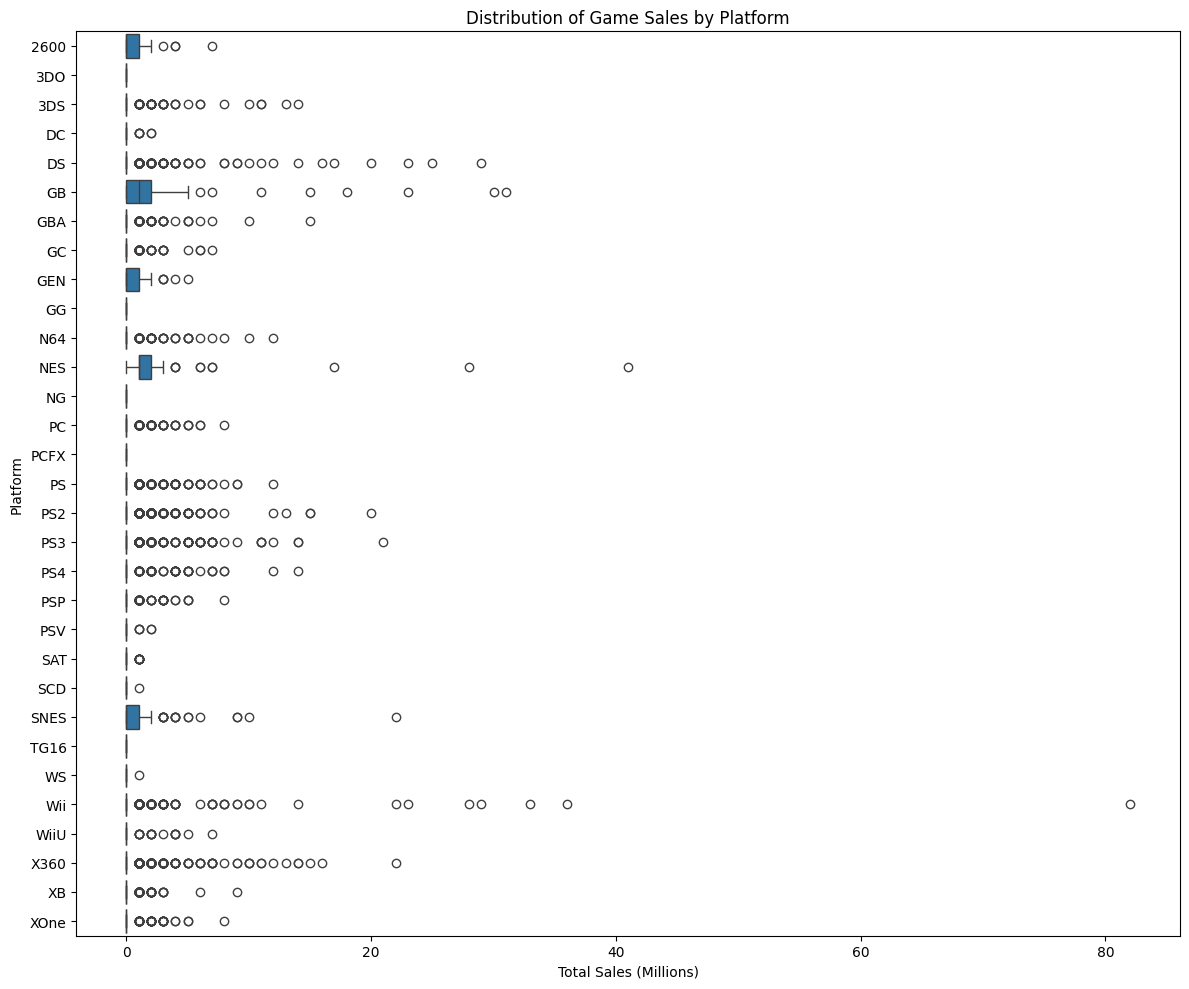

In [38]:
data_files_games['total_sales'] = data_files_games['na_sales'] + data_files_games['eu_sales'] + \
                                 data_files_games['jp_sales'] + data_files_games['other_sales']

plt.figure(figsize=(12, 10))

sns.boxplot(x='total_sales', y='platform', data=data_files_games, orient='h')

plt.xlabel('Total Sales (Millions)')
plt.ylabel('Platform')
plt.title('Distribution of Game Sales by Platform')
plt.tight_layout()
plt.show()

**Summarizes each platform’s lifespan, GAME COUNT, unique release years, and all region sales total to analyze platform performance and longevity.**

In [39]:
platform_release_summary = data_files_games.groupby('platform').agg(
    years_of_release=('year_of_release', lambda x: sorted(x.dropna().unique(), reverse=True)),
    year_count=('year_of_release', lambda x: x.dropna().nunique()),
    game_count=('name', 'count'),
    na_sales_total=('na_sales', 'sum'),
    eu_sales_total=('eu_sales', 'sum'),
    jp_sales_total=('jp_sales', 'sum'),
    other_sales_total=('other_sales', 'sum'),
    all_region_sales_total=('all_region_sales', 'sum')
).sort_values(by='game_count', ascending=False)

pd.set_option('display.max_colwidth', None)
display(platform_release_summary)

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2566190488.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_release_summary = data_files_games.groupby('platform').agg(


,years_of_release,year_count,game_count,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,all_region_sales_total
platform,,,,,,,,
PS2,"[2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 0]",13,2161,434,199,79,89,801
DS,"[2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 1985, 0]",12,2151,222,143,118,22,505
PS3,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 0]",12,1329,282,236,25,56,599
Wii,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 0]",12,1320,363,206,51,36,656
X360,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 0]",13,1262,497,182,0,26,705
PSP,"[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 0]",13,1209,46,33,23,13,115
PS,"[2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 0]",11,1197,248,113,95,3,459
PC,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1992, 1988, 1985, 0]",27,974,74,94,0,5,173
XB,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 0]",10,824,109,18,0,0,127


This output shows the highest game count on the platform's portfolio:
- PS2 leads with the highest volume at 2161 which contributed to their platform ranking the highest in sales at $801M
- DS (2151 count at $505M), PS3 (1329 count at $599M), Wii (1320 count at $656M), and X360 (1262 count at $705M) rounds out the top 5, respectively

**Key Observations:**
- Similar to the sales rankings, two Sony platforms (PS2 and PS3) and two Nintendo platforms (DS and Wii) appear in the top 5 for game count volume
- One Microsoft platform (X360) ranks among the top 5 for game count volume
- Among the top 10 platform rankings by game count volume:
  - Sony platforms account for 40% (PS2, PS3, PS, PSP)
  - Nintendo platforms account for 30% (Wii, DS, GBA)
  - Microsoft platforms account for 30% (PC, X360, XB)

**Platform Comparison: Total Sales vs Number of Games Visual (Top 10)**

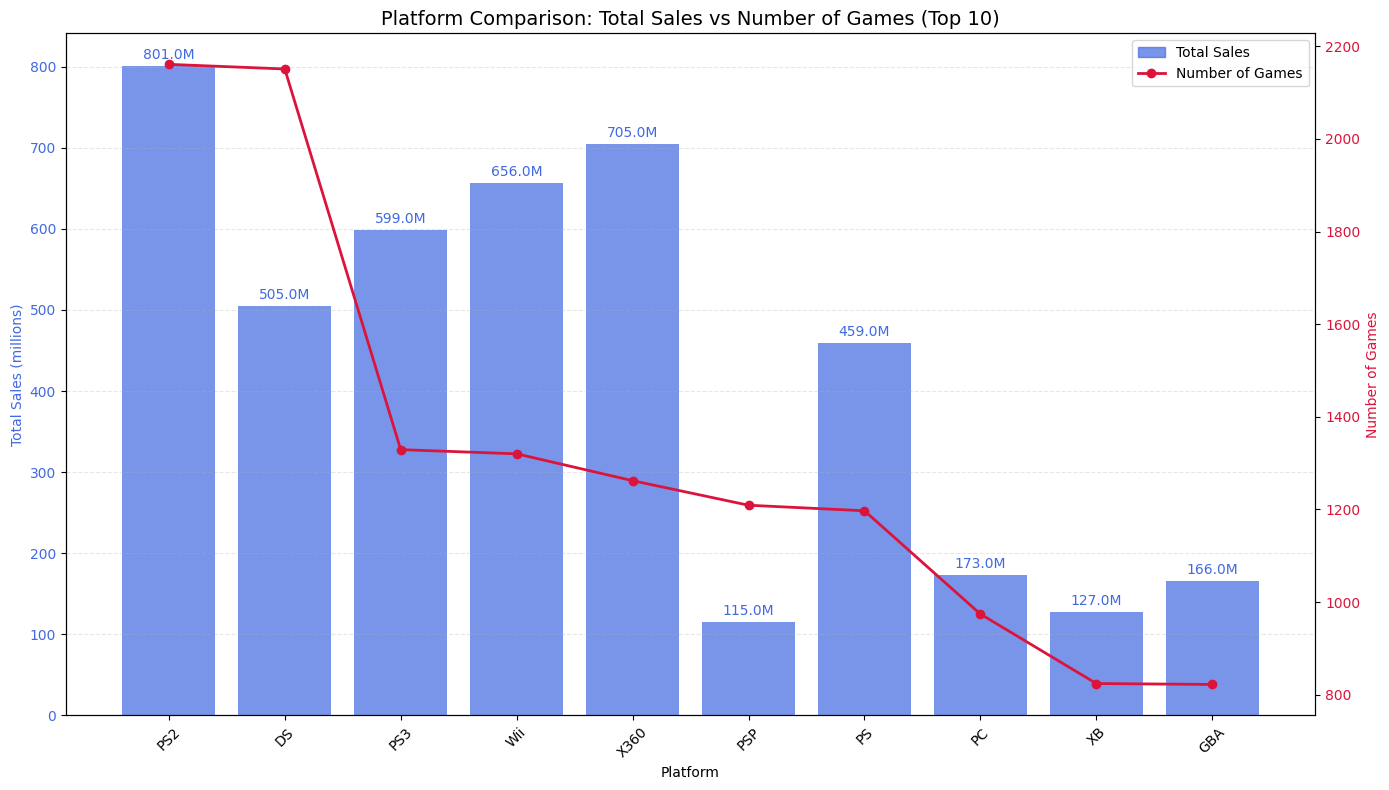

In [40]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Get top 10 platforms by total sales
top_platforms = platform_release_summary.head(10).copy()

# Plot total sales on primary axis (bars)
bars = ax1.bar(top_platforms.index, top_platforms['all_region_sales_total'], color='royalblue', alpha=0.7)
ax1.set_xlabel('Platform')
ax1.set_ylabel('Total Sales (millions)', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
plt.xticks(rotation=45)

# Create secondary axis for game count
ax2 = ax1.twinx()
line = ax2.plot(top_platforms.index, top_platforms['game_count'], marker='o', color='crimson', linewidth=2)
ax2.set_ylabel('Number of Games', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Add title
plt.title('Platform Comparison: Total Sales vs Number of Games (Top 10)', fontsize=14)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    plt.Rectangle((0,0), 1, 1, color='royalblue', alpha=0.7),
    Line2D([0], [0], color='crimson', marker='o', linewidth=2)
]
plt.legend(legend_elements, ['Total Sales', 'Number of Games'])

# Add data labels to bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}M',
             ha='center', va='bottom', color='royalblue')

# Add grid
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Platform Life Spans Grouped by Manufacturer (1985-2020)**

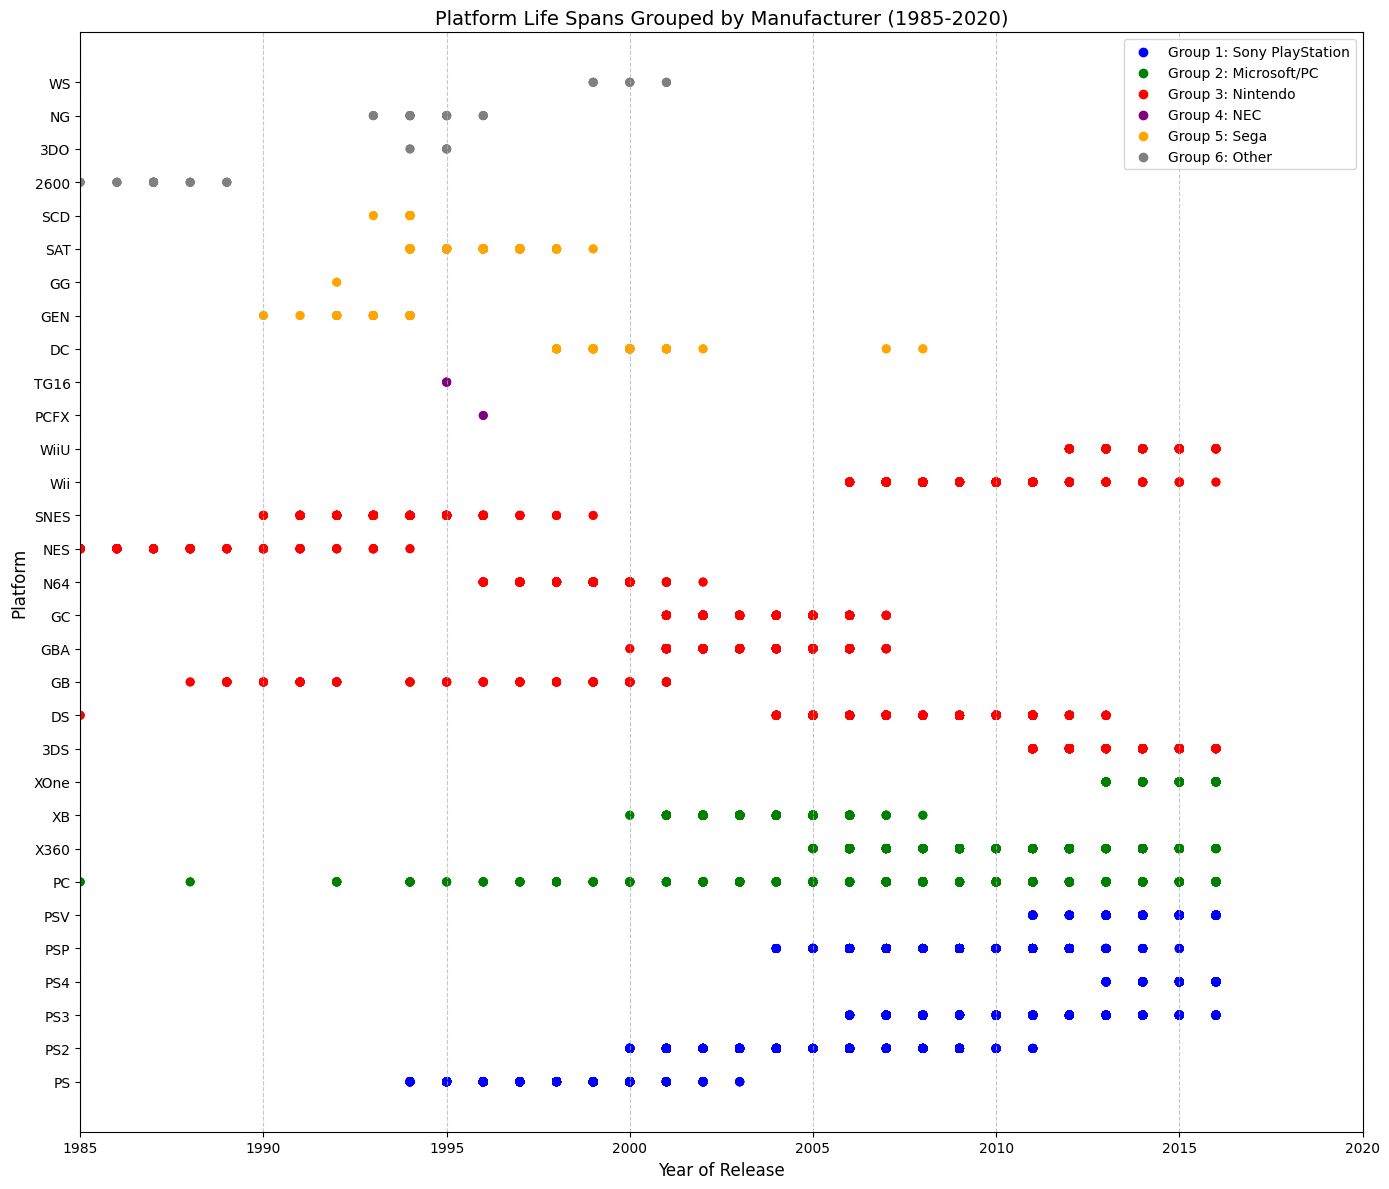

In [41]:
platform_grouped_visual = data_files_games.reset_index()
platform_grouped_visual = platform_grouped_visual.copy()  
platform_grouped_visual = platform_grouped_visual.rename(columns={'year_of_release': 'year'})  
platform_grouped_visual = platform_grouped_visual[platform_grouped_visual['year'] != 0]

# Create a group column based on the specified groupings
conditions = [
    # Group 1: Sony
    platform_grouped_visual['platform'].isin(['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']),
    # Group 2: Microsoft/PC
    platform_grouped_visual['platform'].isin(['PC', 'XB', 'X360', 'XOne']),
    # Group 3: Nintendo
    platform_grouped_visual['platform'].isin(['NES', 'GB', 'SNES', 'N64', 'GBA', 'GC', 'DS', 'Wii', '3DS', 'WiiU']),
    # Group 4: NEC
    platform_grouped_visual['platform'].isin(['TG16', 'PCFX']),
    # Group 5: Sega
    platform_grouped_visual['platform'].isin(['GEN', 'SAT', 'DC', 'SCD', 'GG']),
    # Group 6: Other
    platform_grouped_visual['platform'].isin(['WS', 'NG', '3DO', '2600'])
]

choices = [
    'Group 1: Sony PlayStation', 
    'Group 2: Microsoft/PC', 
    'Group 3: Nintendo', 
    'Group 4: NEC',
    'Group 5: Sega', 
    'Group 6: Other'
]

platform_grouped_visual['group'] = np.select(conditions, choices, default='Other')

# Create a combined field for sorting
platform_grouped_visual['sort_key'] = platform_grouped_visual['group'] + platform_grouped_visual['platform'].astype(str)
platform_grouped_visual = platform_grouped_visual.sort_values(by='sort_key')

# Create the plot
plt.figure(figsize=(14, 12))

# Define colors for each group
colors = {
    'Group 1: Sony PlayStation': 'blue',
    'Group 2: Microsoft/PC': 'green',
    'Group 3: Nintendo': 'red',
    'Group 4: NEC': 'purple',
    'Group 5: Sega': 'orange',
    'Group 6: Other': 'gray'
}

# Create the scatter plot
plt.scatter(
    platform_grouped_visual['year'],
    platform_grouped_visual['sort_key'],
    c=platform_grouped_visual['group'].map(colors),
    marker='o',
    s=30
)

# Extract unique platform/group combinations for y-ticks
unique_platforms = platform_grouped_visual[['platform', 'sort_key', 'group']].drop_duplicates()
unique_platforms = unique_platforms.sort_values('sort_key')


# Set custom y-ticks and labels
plt.yticks(
    range(len(unique_platforms)),
    unique_platforms['platform'],
    fontsize=10
)

# Fix the y-axis position mapping
plt.scatter(
    platform_grouped_visual['year'],
    pd.Categorical(platform_grouped_visual['sort_key'], 
                   categories=unique_platforms['sort_key'], 
                   ordered=True).codes,
    c=platform_grouped_visual['group'].map(colors),
    marker='o',
    s=30
)

# Add a legend using dummy scatter plots
legend_elements = []
for group, color in colors.items():
    legend_elements.append(plt.scatter([], [], color=color, label=group))

plt.legend(handles=legend_elements, loc='upper right')

# Customize the plot
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.title('Platform Life Spans Grouped by Manufacturer (1985-2020)', fontsize=14) # extending the x-axis range to 2020  to include all data points through 2016 and provide some visual margin
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(1985, 2020)
plt.tight_layout()

plt.show()

This output shows the dominant manufacturers in the gaming industry by platform performance:

Sony leads with remarkable market presence through four PlayStation platforms in the top 10: PS2 (ranked 1st with highest sales), PS3 (4th), PS (6th), and PS4 (9th)
Microsoft secured significant positions with the Xbox 360 (2nd) and PC Windows OS platform (10th)
Nintendo rounds out the top 10 with four platforms: Wii (3rd), DS (5th), Game Boy (7th), and NES (8th)

**Key Observations:**

The gaming platform industry is dominated by a small number of companies, primarily based in Japan with notable U.S. competition
PC platform demonstrates exceptional longevity with a 16-year lifecycle—the longest among all 17 platforms analyzed
Among the top 10 platform rankings by sales:

Sony platforms account for 40% of top positions
Nintendo platforms account for 40% of top positions
Microsoft platforms account for 20% of top positions

Japanese manufacturers (Sony and Nintendo combined) hold 80% of the top 10 platforms by sales

In [42]:
platform_release_summary['game_count'].describe()

count      31.000000
mean      539.096774
std       627.603715
min         1.000000
25%        40.000000
50%       247.000000
75%       899.000000
max      2161.000000
Name: game_count, dtype: float64

**Key Statistics:**

- 31 unique gaming platforms in the dataset
  - Average game count: 539 games per platform
  - Standard deviation: 627 games (high variability between platforms)
  - Range: From 1 game (minimum) to 2,161 games (maximum)<br>

- Distribution Percentiles:
  - 25th percentile: 40 games (25% of platforms have 40 or fewer games)
  - 50th percentile (median): 247 games
  - 75th percentile: 899 games

- Distribution Insights:
  - The distribution is heavily right-skewed (mean of 539 > median of 247)
  - A small number of dominant platforms (like PS2 with 2,161 games) drive up the average
  - Most platforms have relatively modest game libraries
  - This highlights the concentrated success among a few dominant gaming platforms in the market.

**Platform Success Factors: Initial Observations**

**Based on the initial findings and observations, successful gaming platforms may include:**

- Entering the market with multiple game options
- Continually refresh their hardware (with a lifecycle of around 7-8 years)
- Building a substantial game library (avg 500+ titles) to maintain user engagement

The initial analysis shows that platforms with an extensive game library, consistent new releases, and longer lifespans—such as the PS2, X360, Wii, PS3, and DS—tended to dominate market sales.
However, the data does not fully explain why certain platforms or games declined while others thrived. What becomes apparent is that success appears correlated with having a diverse suite of platforms and games rather than relying on separate individual offerings. This portfolio strategy appears most effectively implemented by industry leaders Sony and Nintendo, who collectively dominate 80% of the top 10 platform positions with Microsoft accounting for the remaining 20%. The distribution shifts slightly when examining game libraries, where Sony and Nintendo control 70% of game releases across top platforms, while Microsoft commands a proportionally stronger presence with 30% of the game catalog. This comparison reveals Microsoft's ability to foster a robust game ecosystem despite having fewer top-selling platforms. This comparison highlights how platform market share reflects an 80%/20% Japan vs US market share split of the platform market, whereas the distribution of game releases shifts slightly to a 70%/30% Japan vs US market share divide.

###  **Section 5**
- **Data Analysis and Visualizations**

In [43]:
data_files_games2 = data_files_games[(data_files_games['year_of_release'] >= 2011) & 
                                     (data_files_games['year_of_release'] != 0)]

top_eight_platforms = data_files_games2.groupby('platform')['all_region_sales'].sum().sort_values(ascending=False).head(9).index.tolist()
data_files_games2 = data_files_games2[data_files_games2['platform'].isin(top_eight_platforms)]

display(data_files_games2)
data_files_games2.info()

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\3715399194.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_eight_platforms = data_files_games2.groupby('platform')['all_region_sales'].sum().sort_values(ascending=False).head(9).index.tolist()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7,9,1,4,97.0,8.2,M,21,21
23,Grand Theft Auto V,X360,2013,Action,10,5,0,1,97.0,8.1,M,16,16
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9,4,0,1,88.0,3.4,M,14,14
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6,6,0,2,71.0,7.5,Unknown,14,14
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5,4,4,1,71.0,7.5,Unknown,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0,0,0,0,71.0,7.5,Unknown,0,0
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0,0,0,0,80.0,7.6,M,0,0
16696,Breach,PC,2011,Shooter,0,0,0,0,61.0,5.8,T,0,0
16702,STORM: Frontline Nation,PC,2011,Strategy,0,0,0,0,60.0,7.2,E10+,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 3273 entries, 16 to 16710
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              3273 non-null   object  
 1   platform          3273 non-null   category
 2   year_of_release   3273 non-null   int64   
 3   genre             3273 non-null   category
 4   na_sales          3273 non-null   int64   
 5   eu_sales          3273 non-null   int64   
 6   jp_sales          3273 non-null   int64   
 7   other_sales       3273 non-null   int64   
 8   critic_score      3273 non-null   float64 
 9   user_score        3273 non-null   float64 
 10  rating            3273 non-null   category
 11  all_region_sales  3273 non-null   int64   
 12  total_sales       3273 non-null   int64   
dtypes: category(3), float64(2), int64(7), object(1)
memory usage: 293.2+ KB


**Platform Distribution Analysis: Counts and Coverage Percentages**

In [44]:
platform_counts2 = data_files_games2['platform'].value_counts()
display(platform_counts2)

platform_percentages2 = data_files_games2['platform'].value_counts() / data_files_games['platform'].value_counts() * 100
display(platform_percentages2)

platform
PS3     707
3DS     512
X360    498
PS4     392
PC      389
XOne    247
Wii     197
DS      184
WiiU    147
GBA       0
GC        0
3DO       0
DC        0
GB        0
2600      0
PCFX      0
NG        0
NES       0
N64       0
GEN       0
GG        0
PS2       0
PS        0
SCD       0
SAT       0
PSV       0
PSP       0
WS        0
TG16      0
SNES      0
XB        0
Name: count, dtype: int64

platform
2600      0.000000
3DO       0.000000
3DS      98.461538
DC        0.000000
DS        8.554161
GB        0.000000
GBA       0.000000
GC        0.000000
GEN       0.000000
GG        0.000000
N64       0.000000
NES       0.000000
NG        0.000000
PC       39.938398
PCFX      0.000000
PS        0.000000
PS2       0.000000
PS3      53.197893
PS4     100.000000
PSP       0.000000
PSV       0.000000
SAT       0.000000
SCD       0.000000
SNES      0.000000
TG16      0.000000
WS        0.000000
Wii      14.924242
WiiU    100.000000
X360     39.461173
XB        0.000000
XOne    100.000000
Name: count, dtype: float64

**Total Sales by Platform (2011 Onward)**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\533759627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_release_summary2 = data_files_games2.groupby('platform')['all_region_sales'].sum().sort_values(ascending=False)


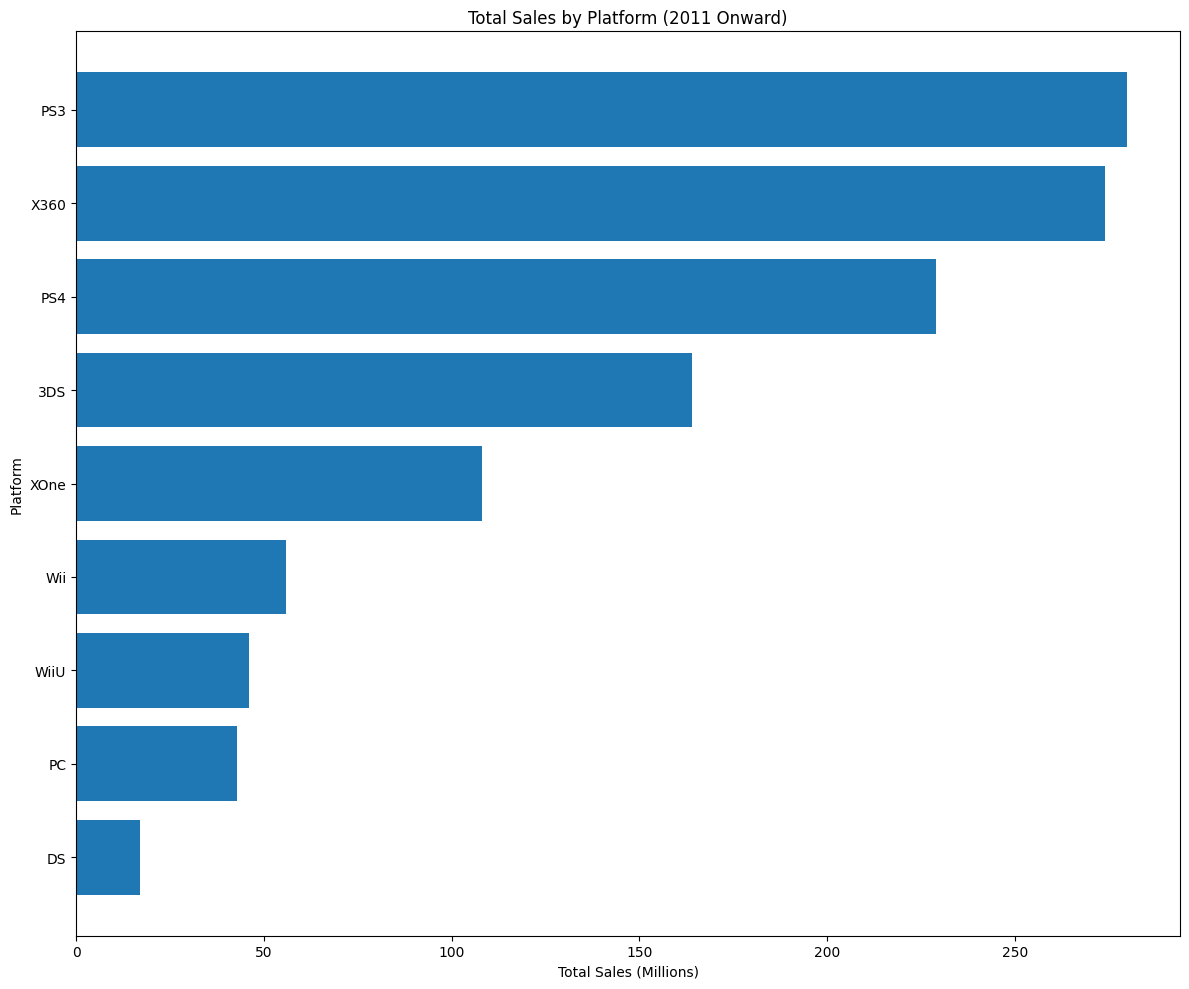

In [45]:
platform_release_summary2 = data_files_games2.groupby('platform')['all_region_sales'].sum().sort_values(ascending=False)

platform_release_summary2_filtered = platform_release_summary2[platform_release_summary2.index.isin(top_eight_platforms)]

plt.figure(figsize=(12, 10))
plt.barh(platform_release_summary2_filtered.index, platform_release_summary2_filtered)
plt.gca().invert_yaxis()
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Platform')
plt.title('Total Sales by Platform (2011 Onward)')
plt.tight_layout()
plt.show()

This bar chart shows the sum of all game sales for each platform 2011-2016 (cumulative/total sales)
- PS3 leads with sales surpassing $250M as opposed to PS2 which lead amongst overall platform sales ($801M)
- X360, PS4, 3DS and XOne round out the top 5, respectively

**Key Observations:**
- Two Sony platforms (PS3 and PS4) and two Microsoft platforms (X360 and XOne) appear in the top 5 indicating that Micrisoft is taking away some market share from Nintendo
- One Nintendo platform (3DS) ranks among the top 5 for game count volume
- Among the top 10 platform rankings by game count volume:
  - Nintendo platforms account for 44% (3DS, Wii, WiiU, DS)
  - Microsoft platforms account for 30% (X360, XOne, PC) 
  - Sony platforms account for 22% (`PS3, PS4)

**Distribution of TOP 8 Game Sales by Platform (2011 Onward)**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\392511412.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_eight_platforms = recent_games.groupby('platform')['total_sales'].sum()\


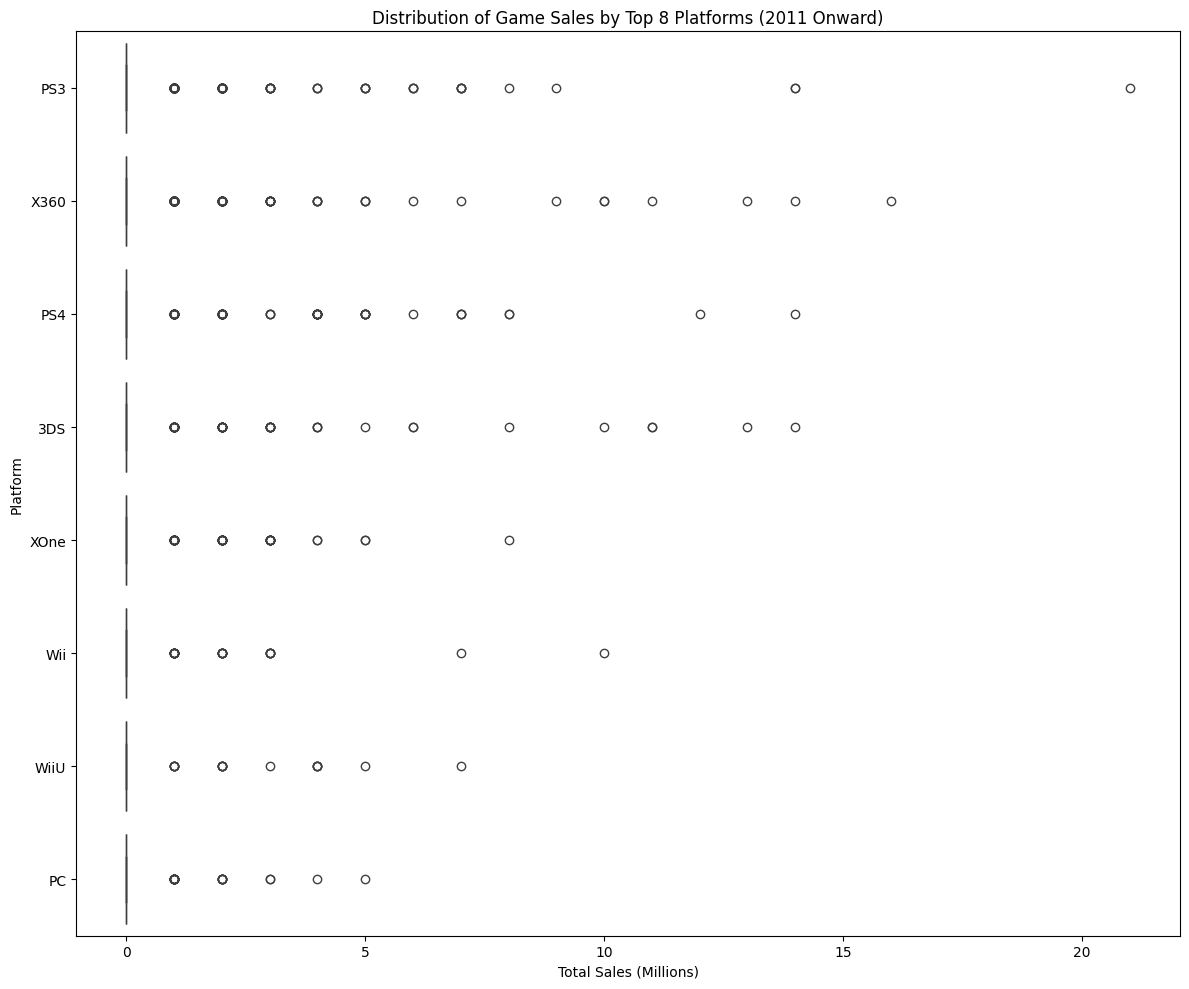

In [46]:
recent_games = data_files_games2[data_files_games2['year_of_release'] >= 2011]

recent_games['total_sales'] = recent_games['na_sales'] + recent_games['eu_sales'] + \
                             recent_games['jp_sales'] + recent_games['other_sales']

top_eight_platforms = recent_games.groupby('platform')['total_sales'].sum()\
                               .sort_values(ascending=False).head(8).index.tolist()

filtered_data = recent_games[recent_games['platform'].isin(top_eight_platforms)]

plt.figure(figsize=(12, 10))
sns.boxplot(x='total_sales', y='platform', data=filtered_data, orient='h', 
    order=top_eight_platforms, showfliers=True)

plt.xlabel('Total Sales (Millions)')
plt.ylabel('Platform')
plt.title('Distribution of Game Sales by Top 8 Platforms (2011 Onward)')
plt.tight_layout()
plt.show()

**The boxplot showed Distribution of Game Sales by Top 8 Platforms (2011 Onward)**<br>

- The box plot reveals that the majority of games—including those on popular consoles—record very low sales in the period after 2011. 
- The boxes appear as thin lines because the interquartile range is tightly clustered near zero, indicating that only a few outlier titles reach substantial sales figures. 
- To provide a clearer view of the distribution, the following visualization focuses exclusively on games that generated at least $1 million in sales.

**Post-2011 Game Sales - Addressing Skewness in Game Sales Distribution Analysis**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\3354908553.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_eight_platforms = recent_games_filtered.groupby('platform')['total_sales'].sum()\


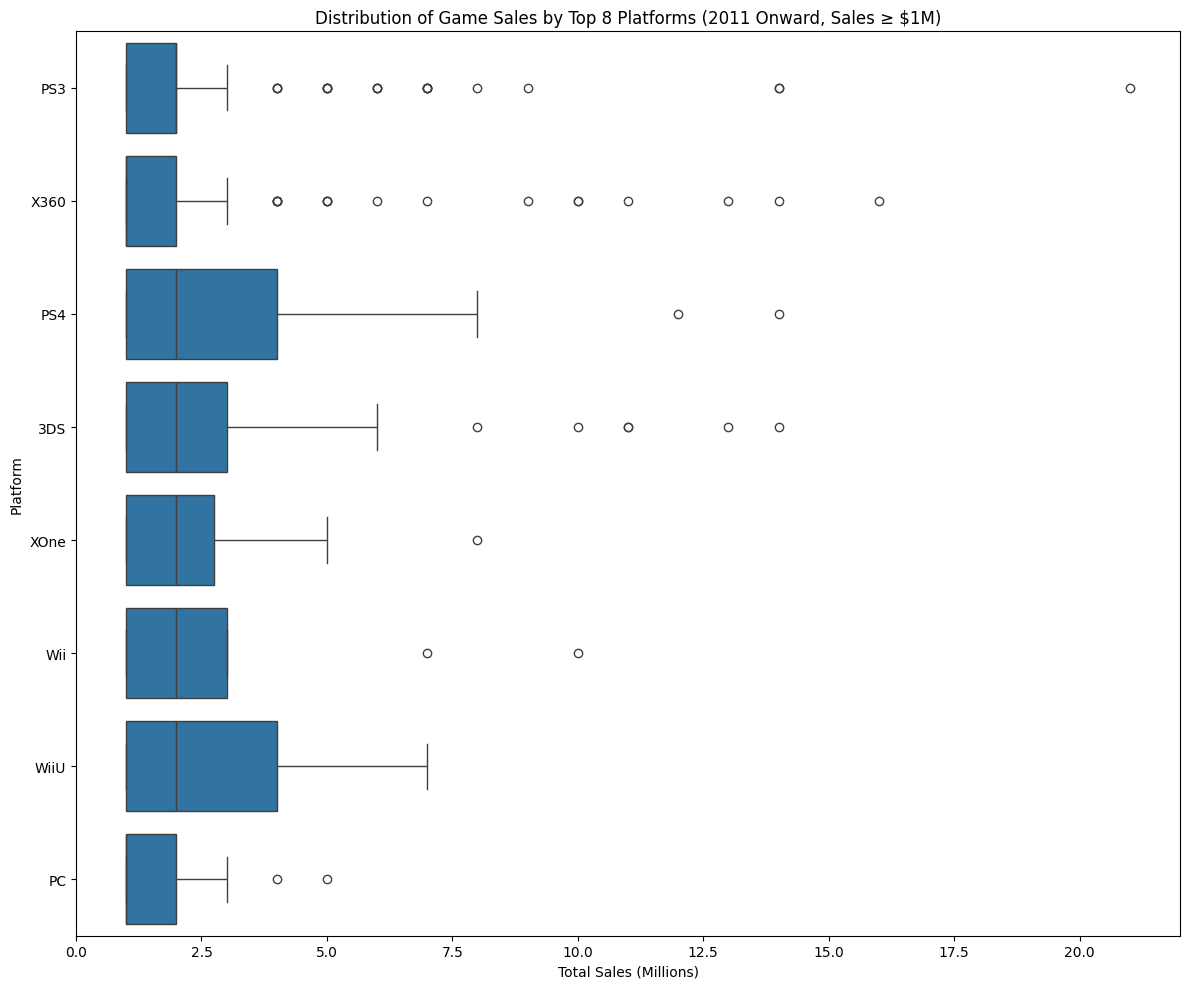

In [47]:
recent_games = data_files_games2[data_files_games2['year_of_release'] >= 2011]
recent_games['total_sales'] = recent_games['na_sales'] + recent_games['eu_sales'] + \
                             recent_games['jp_sales'] + recent_games['other_sales']

recent_games_filtered = recent_games[recent_games['total_sales'] >= 1]

top_eight_platforms = recent_games_filtered.groupby('platform')['total_sales'].sum()\
                               .sort_values(ascending=False).head(8).index.tolist()
filtered_data = recent_games_filtered[recent_games_filtered['platform'].isin(top_eight_platforms)]

plt.figure(figsize=(12, 10))
sns.boxplot(x='total_sales', y='platform', data=filtered_data, orient='h',
    order=top_eight_platforms, showfliers=True)
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Platform')
plt.title('Distribution of Game Sales by Top 8 Platforms (2011 Onward, Sales ≥ $1M)')
plt.tight_layout()
plt.show()

This boxplot shows the distribution of game sales for each platform 2011-2016 (cumulative/total sales)
- The PS3 outliers may reflect exceptional sales for specific titles from a loyal fanbase. 
- In contrast, the PS4’s stronger overall performance suggests both the migration of that fanbase to the newer console and the successful onboarding of new users. 
- The broader distribution of successful games on the PS4, WiiU, 3DS and XOne indicates a maturing platforms, perhaps characterized by a strong catalog across multiple titles rather than dependence on a few standout ones.

**Key Observations:**
- Although the PS3 leads in total cumulative sales (as shown in the previous chart), its individual game sales distribution presents a different picture.
- PS4 and WiiU exhibit wider interquartile ranges, indicating greater variability in sales among their successful titles.
- Both PS3 and X360 feature numerous high-performing outliers, with the PS3 notably having a title approaching $20M in sales.
- Median sales for most platforms' successful games fall between $1M and $3M.
- The wider boxes for PS4, WiiU, and 3DS suggest more consistent performance across their successful releases.
- PC shows a narrower sales distribution with fewer standout outliers compared to console platforms.

**Platform Life Span: Game Releases Over Years (Top 8 Platforms)**

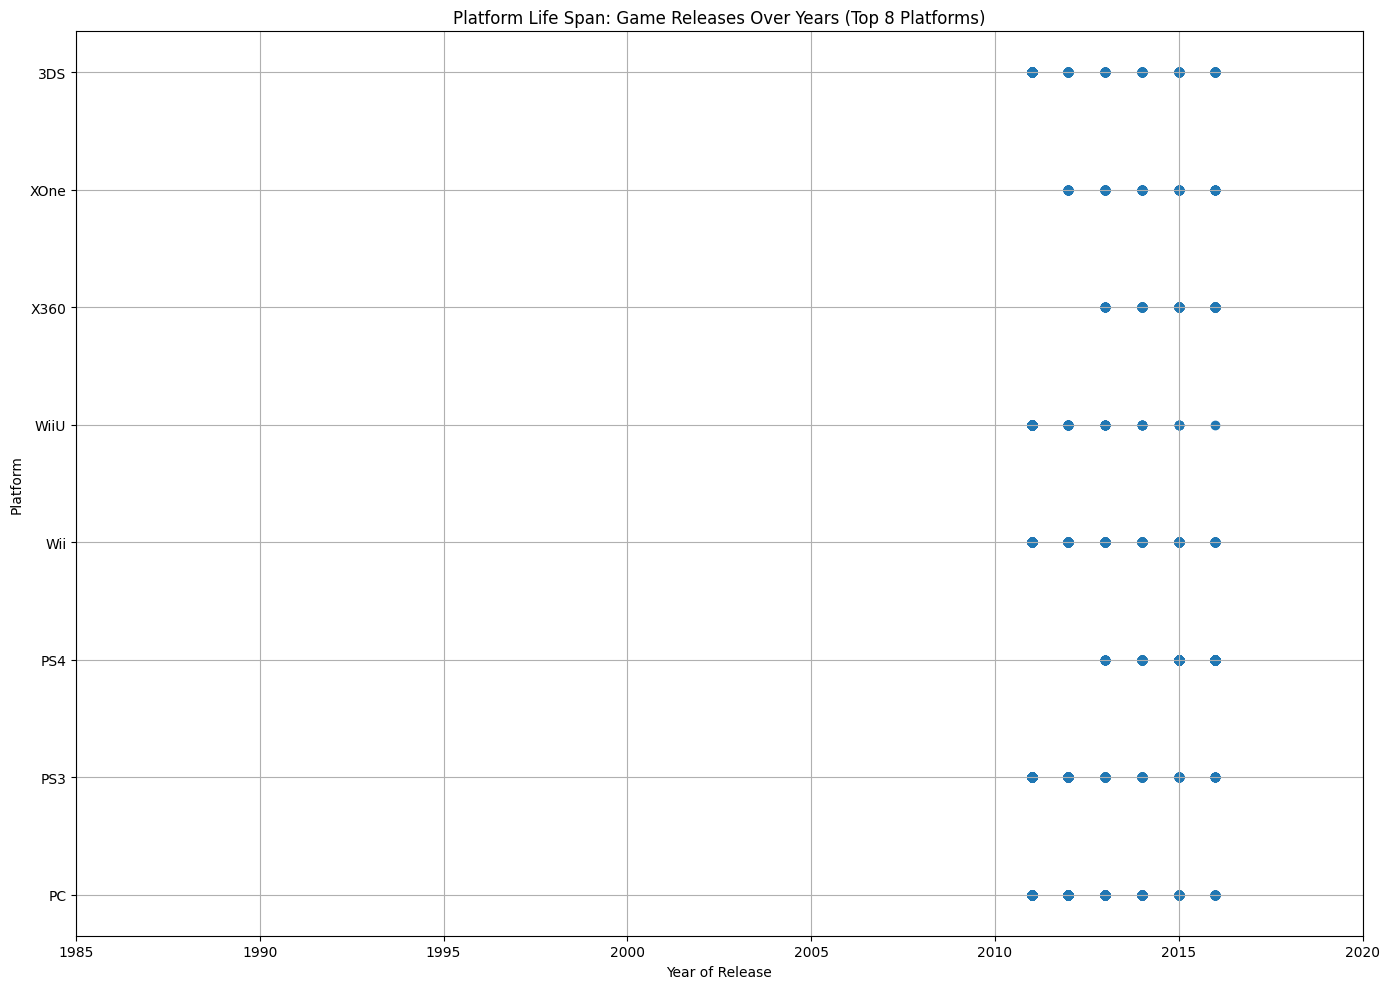

In [48]:
top_eight_platforms = ['PC', 'PS3', 'PS4', 'Wii', 'WiiU', 'X360', 'XOne', '3DS']

console_release_data = data_files_games2.copy()

console_release_data = console_release_data.reset_index(drop=True)

console_release_data = console_release_data.explode('year_of_release')

console_release_data = console_release_data[console_release_data['year_of_release'] != 0]
console_release_data = console_release_data[console_release_data['platform'].isin(top_eight_platforms)]

console_release_data['platform_ordered'] = pd.Categorical(
    console_release_data['platform'],
    categories=top_eight_platforms,
    ordered=True
)

plt.figure(figsize=(14, 10))
plt.scatter(console_release_data['year_of_release'], console_release_data['platform_ordered'], marker='o')
plt.yticks(range(len(top_eight_platforms)), top_eight_platforms)
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.title('Platform Life Span: Game Releases Over Years (Top 8 Platforms)')
plt.grid(True)
plt.xlim(1985, 2020)
plt.tight_layout()
plt.show()

**Platform Life Span: Game Releases Over Years (Top 8 Platforms)**

This visualization presents the release history (2010–2016) of the top eight gaming platforms, offering focused context for forecasting 2017 trends:
- All platforms maintained active game releases up to 2016, though they were at varying stages of their life spans.
- The PS4, launched in 2013, was still in the early-to-mid phase of its cycle by 2016, indicating strong growth potential.
- Similarly, the Xbox One (XOne), also released in 2013, appeared poised for sustained market presence.
- The WiiU, introduced around 2012, had a noticeably shorter active period compared to competitors, hinting at potential challenges.
- PC exhibited consistent release activity throughout the period, underscoring its platform stability.
- The 3DS maintained steady releases through 2016, signaling ongoing viability in its category.

**Key Insights:**
- A 3–4 year overlap between console generations (e.g., PS3 → PS4, X360 → XOne, Wii → WiiU) highlights transition patterns.
- Platforms like PS4 and XOne were mid-lifecycle by 2016, suggesting they would likely dominate the 2017 market.
- Older platforms (PS3, X360, Wii) were nearing the end of their cycles, implying reduced relevance in 2017.
- Understanding these timelines is insightful for gauging which platforms to model for the 2017 calendar year.

**Calculating Average Gaming Platform Lifecycle**

In [49]:
data_files_games_x0 = data_files_games[data_files_games['year_of_release'] !=0]

avg_platform_lifespan = data_files_games_x0.groupby('platform')['year_of_release'].nunique()

avg_lifespan = avg_platform_lifespan.mean()
display(f"Average Platform Lifecycle: {avg_lifespan:.2f} years")

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\850814241.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_platform_lifespan = data_files_games_x0.groupby('platform')['year_of_release'].nunique()


'Average Platform Lifecycle: 7.68 years'

**Calculating Average Gaming Platform Lifecycle (excluding PC which spans 31 yrs)**

In [50]:
data_files_games_x0 = data_files_games[data_files_games['year_of_release'] != 0]

data_files_games_xPC = data_files_games_x0[data_files_games_x0['platform'] != 'PC']

avg_platform_lifespan_xPC = data_files_games_xPC.groupby('platform')['year_of_release'].nunique()

avg_lifespan_xPC = avg_platform_lifespan_xPC.mean()

display(f"Average Platform Lifecycle (excluding PC data): {avg_lifespan_xPC:.2f} years")

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\1148707920.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_platform_lifespan_xPC = data_files_games_xPC.groupby('platform')['year_of_release'].nunique()


'Average Platform Lifecycle (excluding PC data): 6.84 years'

**Impact of PC Platform Exclusion on Average Gaming Hardware Lifecycles**<br>

After removing the PC platform (an outlier with a 31-year lifespan), the average platform lifespan decreased from 7.68 to 6.84 years – a reduction of just 0.84 years or approximately 10.9%.<br>
This relatively modest change, despite eliminating such an extreme outlier, can be attributed to two key factors:
  - The dilution effect across 31 distinct platforms, which minimizes the impact of any single outlier
  - The concentration of most platform lifespans up to the 12 year range, creating a robust central tendency<br>
This analysis confirms that the gaming hardware market operates on a fairly consistent lifecycle pattern. Platforms typically enter and exit the market within a predictable timeframe, regardless of exceptional cases like the PC platform's extended presence.

In [51]:
data_files_games_x0 = data_files_games[data_files_games['year_of_release'] != 0]

ps_family = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
ps_data = data_files_games_x0[data_files_games_x0['platform'].isin(ps_family)]

ps_family_lifespans = ps_data.groupby('platform')['year_of_release'].agg(lambda x: x.max() - x.min() + 1)
ps_avg_lifespan = ps_family_lifespans.mean()
display(f"Average Platform Lifecycle (PS family): {ps_avg_lifespan:.2f} years")

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\3674570488.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ps_family_lifespans = ps_data.groupby('platform')['year_of_release'].agg(lambda x: x.max() - x.min() + 1)


'Average Platform Lifecycle (PS family): 9.17 years'

**Sony PlayStation's Extended Market Presence: Outperforming Industry Averages**<br>
The PlayStation faportfolio of systems (PS, PS2, PS3, PS4, PSP, and PSV) – which includes the dataset's top-selling platform, the PS2 – demonstrates an average market presence of 9.17 years.<br>
This duration exceeds the all-inclusive platform average by 1.49 years and surpasses the platform average (excluding PC data) by 2.33 years, highlighting Sony's ability of maintaining longer platform lifecycles against its competitors.

**Top 10 Genre-Platform Combinations by Total Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\3593583337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_platform_sales = data_files_games.groupby(['genre', 'platform'])['all_region_sales'].sum().reset_index()


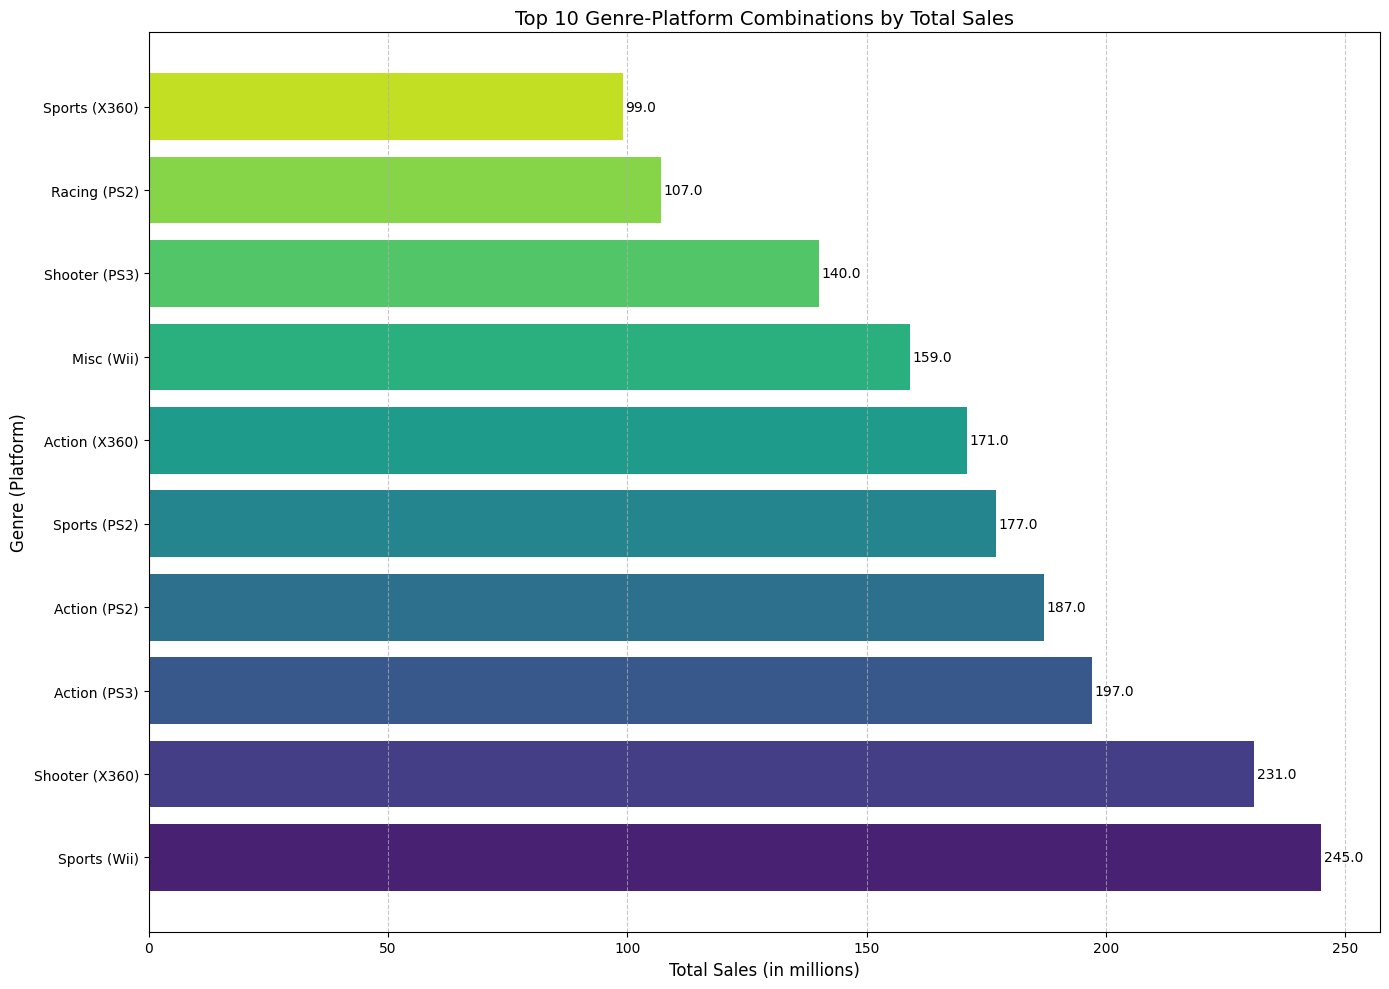

In [52]:
genre_platform_sales = data_files_games.groupby(['genre', 'platform'])['all_region_sales'].sum().reset_index()

# Sort by sales and get top 15 combinations
top_combinations = genre_platform_sales.sort_values('all_region_sales', ascending=False).head(10)

# Create a figure with appropriate size
plt.figure(figsize=(14, 10))

# Create a horizontal bar chart
bars = plt.barh(
    y=range(len(top_combinations)),
    width=top_combinations['all_region_sales'],
    color=sns.color_palette('viridis', len(top_combinations))
)

# Create combined labels for genre-platform
combo_labels = [f"{genre} ({platform})" for genre, platform in 
                zip(top_combinations['genre'], top_combinations['platform'])]

# Set the y-tick labels to the combined labels
plt.yticks(range(len(top_combinations)), combo_labels)

# Add labels and title
plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Genre (Platform)', fontsize=12)
plt.title('Top 10 Genre-Platform Combinations by Total Sales', fontsize=14)

# Add the sales values at the end of each bar
for i, v in enumerate(top_combinations['all_region_sales']):
    plt.text(v + 0.5, i, f'{v:.1f}', va='center')

# Add a grid for easier reading
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Top 10 Genre-Platform Combinations by Total Sales Breakdown**

This bar chart displays the Top 10 Genre-Platform Combinations by Total Sales (in millions):
- Sports (Wii) leads with $245M in sales.
- Shooter (X360) follows closely at $231M.<br>

- Action games feature prominently across multiple platforms:
  - PS3: $197M
  - PS2: $187M
  - X360: $171.6M<br>

- Sports games also show strong cross-platform success:
  - Wii: #1 at $245M
  - PS2: #6 at $177M
  - X360: #10 at $99M


**Key Observations:**
**Platform-Specific Genre Strengths:**

- Wii dominates in Sports and Miscellaneous games (#1 and #4).
  - X360 excels in Shooter and Action genres. 
  - PS3 performs strongly with Action and Shooter titles.
  - PS2 remains relevant with Sports, Action, and Racing games.

- Genre Distribution Among Top 10:
  - Sports: 30% (Wii, PS2, X360)
  - Action: 30% (PS3, PS2, X360)
  - Shooter: 20% (X360, PS3)
  - Miscellaneous: 10% (Wii)
  - Racing: 10% (PS2)

**Total Sales by Genre Across All Platforms**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\3937985263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_sales = data_files_games.groupby('genre')['total_sales'].sum().reset_index()


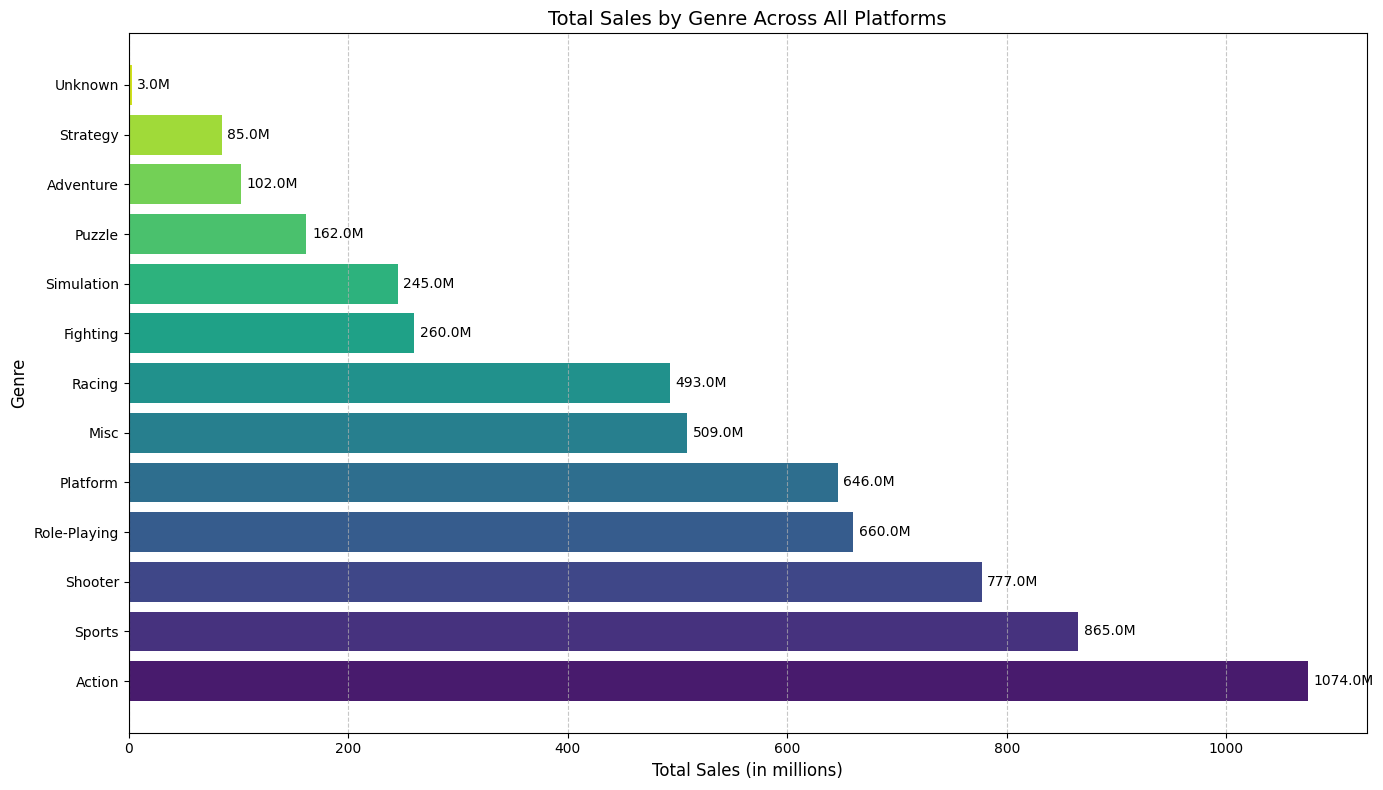

In [53]:
genre_sales = data_files_games.groupby('genre')['total_sales'].sum().reset_index()

genre_sales = genre_sales.sort_values('total_sales', ascending=False)

plt.figure(figsize=(14, 8))

bars = plt.barh(
    y=genre_sales['genre'],
    width=genre_sales['total_sales'],
    color=sns.color_palette('viridis', len(genre_sales))
)

plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Total Sales by Genre Across All Platforms', fontsize=14)

for i, v in enumerate(genre_sales['total_sales']):
    plt.text(v + 5, i, f'{v:.1f}M', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Total Sales by Genre Across All Platforms Breakdown**<br>

This bar chart displays Total Sales by Genre Across All Platforms (in millions):
- Action leads with $1,074M in total sales, significantly outperforming other genres.
- Sports follows with $865M, consistent with its strong performance in the previous platform-specific analysis.
- Shooter ($777M), Role-Playing ($660M), and Platform ($646M) complete the top five.
- Collectively, the top three genres—Action, Sports, and Shooter—generate over $2.7 billion in sales.

**Key Observations:**

While the previous chart highlighted Sports (Wii) as the top-performing genre-platform combination, this visualization shows that Action games dominate overall revenue when aggregated across all platforms.

Sales data reveals four distinct performance levels:
- Tier 1 (800M+): Action, Sports
- Tier 2 (600M–800M): Shooter, Role-Playing
- Tier 3 (400M–600M): Platform, Miscellaneous, Racing
- Tier 4 (Below 300M): Fighting, Simulation, Puzzle, Adventure, Strategy, Unknown

**Sales Distribution of Top Genres Across Top Platforms**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\1974026926.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_platform_sales = top_genre_data.groupby(['genre', 'platform'])['total_sales'].sum().reset_index()
C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\1974026926.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms = data_files_games.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()


<Figure size 1400x1000 with 0 Axes>

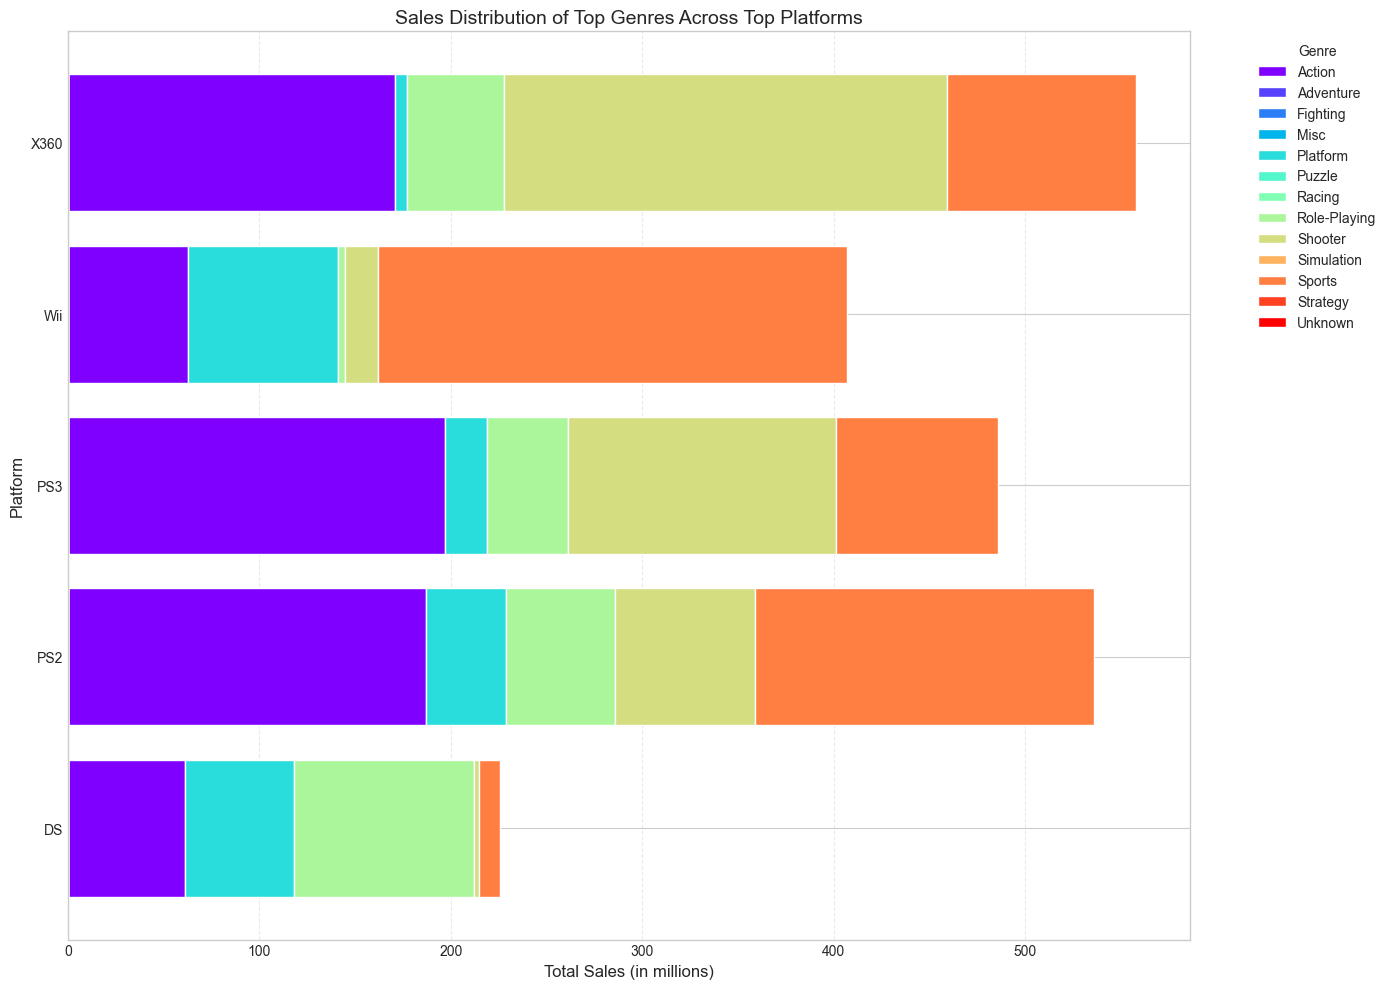

In [71]:
top_genres = genre_sales.head(5)['genre'].tolist()

top_genre_data = data_files_games[data_files_games['genre'].isin(top_genres)]

genre_platform_sales = top_genre_data.groupby(['genre', 'platform'])['total_sales'].sum().reset_index()

top_platforms = data_files_games.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()

genre_platform_top = genre_platform_sales[genre_platform_sales['platform'].isin(top_platforms)]

pivot_data = genre_platform_top.pivot(index='platform', columns='genre', values='total_sales').fillna(0)

plt.figure(figsize=(14, 10))
pivot_data.plot(kind='barh', stacked=True, figsize=(14, 10),
                colormap='rainbow', width=0.8)

plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.title('Sales Distribution of Top Genres Across Top Platforms', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

This stacked bar chart displays the Sales Distribution of Top Genres Across Leading Platforms:
- X360:
  - Dominated by Action (purple), followed by smaller segments of Role-Playing (light green), a substantial share of Shooter (yellow), and Sports (orange) rounding out the key revenue sources.

- Wii:
  - Strongly led by Sports (orange), accounting for over half of total sales. Platform games (turquoise) form the second-largest segment, with a smaller contribution from Action (purple).

- PS3:
  - Action (purple) comprises the largest share, followed by significant portions of Shooter (yellow) and Sports (orange), along with a smaller presence of Racing (light green).

- PS2:
  - Displays the most balanced distribution, with Action (purple) leading, and sizable contributions from Sports (orange), Shooter (yellow), and Racing (light green).

- DS:
  - Shows lower overall sales, with Role-Playing (light green) as the primary genre, accompanied by similar contributions from Action (purple) and Platform (turquoise), and minimal sales from Sports (orange).

  **Key Observations:**

Platform-Specific Genre Strengths:
- Wii dominates in Sports and Platform games.
- X360 excels in Shooter, Action, and Role-Playing genres.
- PS3 performs strongly with Action, Shooter, and Sports titles.
- PS2 maintains relevance with Action, Sports, Shooter, and Racing games.
- DS shows strength in Role-Playing, with balanced contributions from Action and Platform genres.

**Action further demonstrates its populatiry in this visualization**

**Sales vs. Scores for Top Genre-Platform Combinations**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\673393069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_platform_data = data_files_games.groupby(['genre', 'platform']).agg({


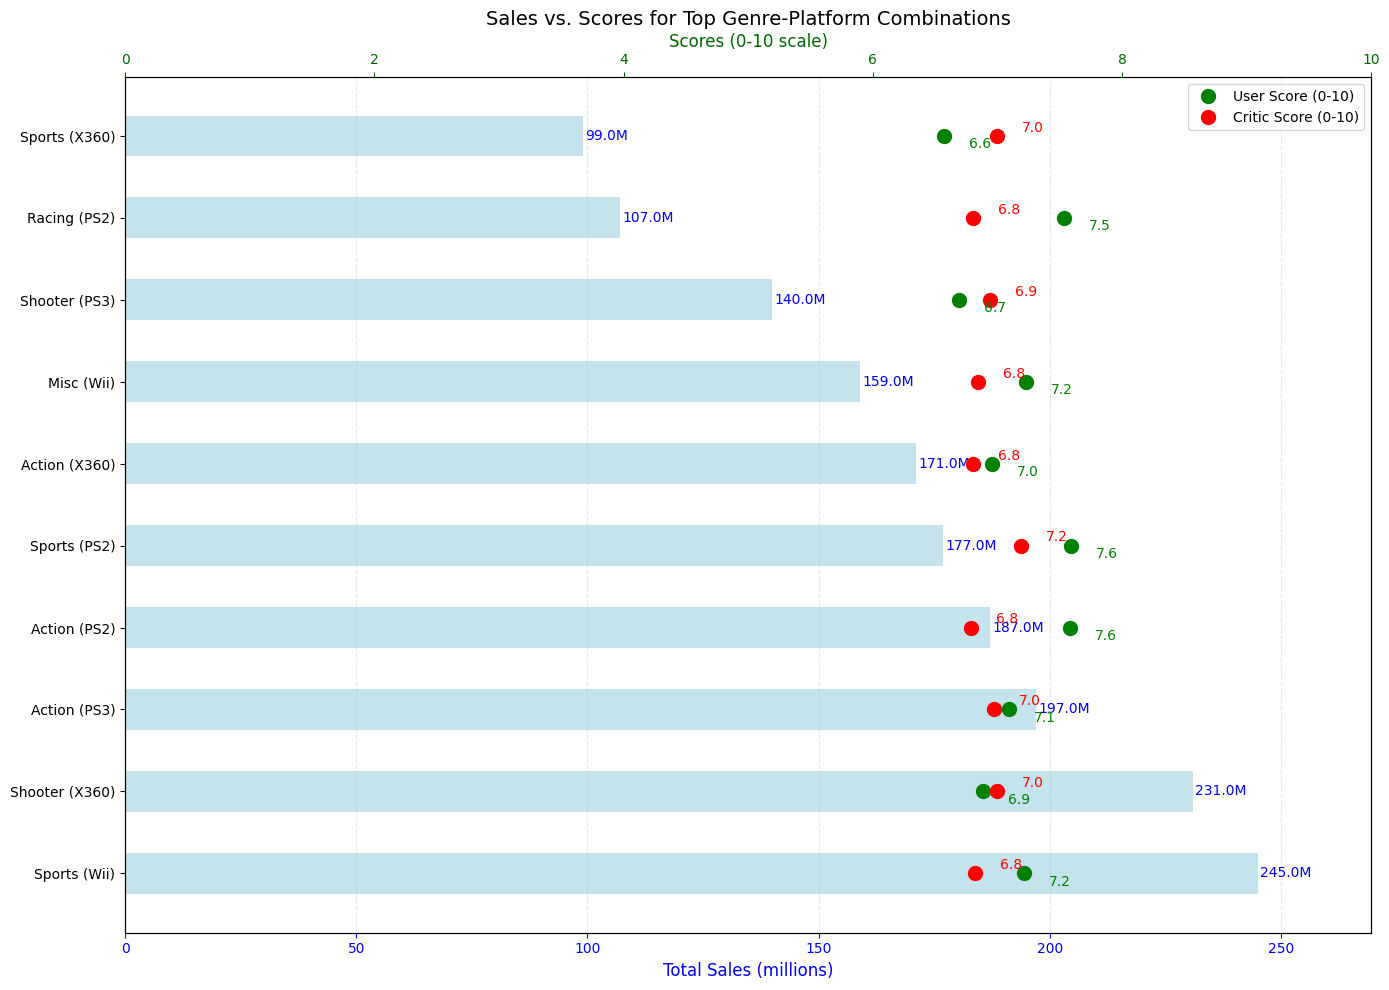

In [55]:
genre_platform_data = data_files_games.groupby(['genre', 'platform']).agg({
    'all_region_sales': 'sum',
    'user_score': 'mean',
    'critic_score': 'mean'
}).reset_index()

# Sort by sales and get top 15 combinations
top_combinations = genre_platform_data.sort_values('all_region_sales', ascending=False).head(10)

# Create labels for the y-axis (genre-platform combinations)
combo_labels = [f"{genre} ({platform})" for genre, platform in 
                zip(top_combinations['genre'], top_combinations['platform'])]

# Set up the figure with two x-axes
fig, ax1 = plt.subplots(figsize=(14, 10))

# Plot the sales bars
bars = ax1.barh(range(len(top_combinations)), top_combinations['all_region_sales'], 
                color='lightblue', alpha=0.7, height=0.5)

# Set up a second axis that shares the y-axis
ax2 = ax1.twiny()

# Scale the critic score from 0-100 to 0-10 for comparison with user score
critic_score_scaled = top_combinations['critic_score'] / 10

# Plot the scores as points
ax2.scatter(top_combinations['user_score'], range(len(top_combinations)), 
            color='green', s=100, label='User Score (0-10)')
ax2.scatter(critic_score_scaled, range(len(top_combinations)), 
            color='red', s=100, label='Critic Score (0-10)')

# Configure the primary axis (sales)
ax1.set_yticks(range(len(top_combinations)))
ax1.set_yticklabels(combo_labels)
ax1.set_xlabel('Total Sales (millions)', fontsize=12, color='blue')
ax1.tick_params(axis='x', colors='blue')
ax1.set_xlim(0, top_combinations['all_region_sales'].max() * 1.1)

# Add sales values to the end of each bar
for i, v in enumerate(top_combinations['all_region_sales']):
    ax1.text(v + 0.5, i, f'{v:.1f}M', va='center', color='blue')

# Configure the secondary axis (scores)
ax2.set_xlim(0, 10)
ax2.set_xlabel('Scores (0-10 scale)', fontsize=12, color='darkgreen')
ax2.tick_params(axis='x', colors='darkgreen')

# Add score values next to each point
for i, (user, critic) in enumerate(zip(top_combinations['user_score'], critic_score_scaled)):
    ax2.text(user + 0.2, i - 0.1, f'{user:.1f}', va='center', color='green')
    ax2.text(critic + 0.2, i + 0.1, f'{critic:.1f}', va='center', color='red')

# Add a grid for easier reading
ax1.grid(axis='x', linestyle='--', alpha=0.3)

# Add title and legend
plt.title('Sales vs. Scores for Top Genre-Platform Combinations', fontsize=14)
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Game Sales vs Ratings: Market Performance Appears Independent of Rating Metrics**

Upon examining the visualization, the difference between user and critic scores varies from 0.1 to 1.0 points across genre-platform combinations. Key observations about the scores:

- User scores: range approximately from 6.6 to 7.6 (on a 0-10 scale)
- Critic scores: range approximately from 6.8 to 7.2 (on a 0-100 scale)

Notably, none of the top-selling genre-platform combinations exceeded an 8.0 rating from either critics or users. This suggests that the most commercially successful games aren't necessarily the most<br>
highly rated. Both critics (who typically evaluate technical execution and design) and users (who focus on experience and value) seem to rate these bestselling titles as good but not exceptional, mostly<br>
falling in the 'above average' range rather than 'excellent' territory. 

Lastly, this observation is made on a subset of data allowing for the possibility that a different pattern can emerge with more comprehensive data.

**Section 4.2 Data Analysis**
 - Diagnostic Analytics

In [56]:
data_files_games[data_files_games['year_of_release'] >= 2011].nunique()

name                2418
platform              12
year_of_release        6
genre                 12
na_sales              11
eu_sales               8
jp_sales               5
other_sales            4
critic_score          75
user_score            86
rating                 7
all_region_sales      17
total_sales           17
dtype: int64

In [57]:
sorted(data_files_games[data_files_games['year_of_release'] >= 2011]['genre'].unique())

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [58]:
#data_files_games2 = data_files_games.set_index(['Name', 'Platform']).sort_index(level=['Name', 'Platform'])

**'NA Sales by Top 5 Platforms and Genres (in Millions)**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2430787208.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms = data_files_games.groupby('platform')['na_sales'].sum().nlargest(5)
C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2430787208.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_scores = data_files_games[data_files_games['platform'].isin(top_platforms_list)].groupby('platform').agg({


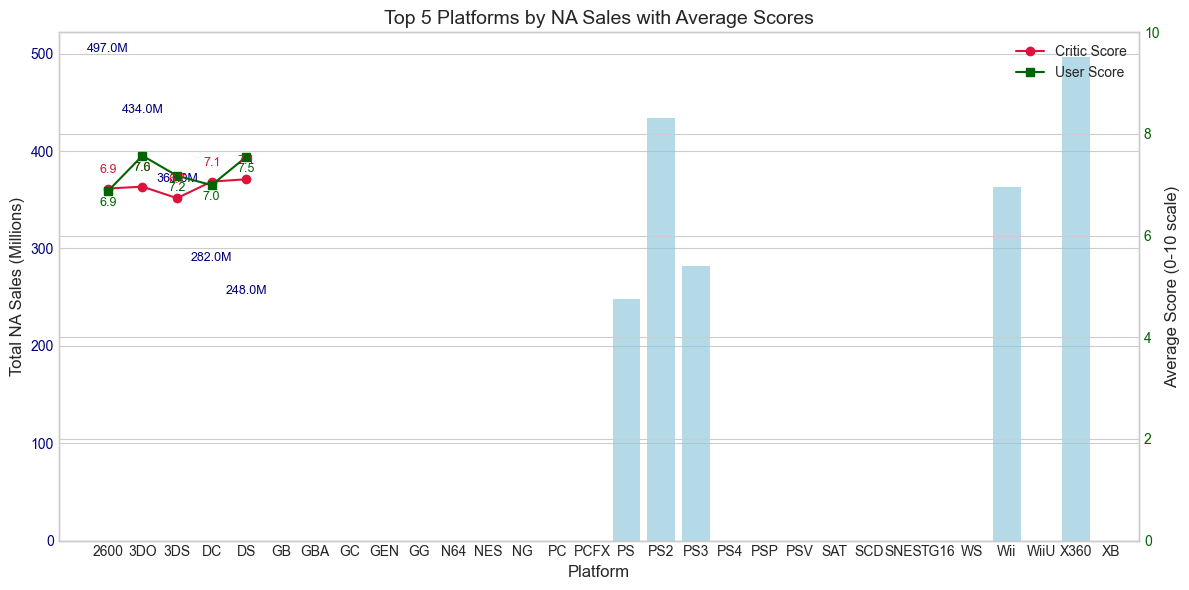

In [59]:
plt.style.use('seaborn-v0_8-whitegrid')

top_platforms = data_files_games.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_list = top_platforms.index.tolist()

# Calculate average critic and user scores for each top platform
platform_scores = data_files_games[data_files_games['platform'].isin(top_platforms_list)].groupby('platform').agg({
    'critic_score': 'mean',
    'user_score': 'mean'
}).reindex(top_platforms.index)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart on primary y-axis
sns.barplot(x=top_platforms.index, y=top_platforms.values, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_ylabel('Total NA Sales (Millions)', fontsize=12)
ax1.set_xlabel('Platform', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()

ax2.plot(range(len(platform_scores)), platform_scores['critic_score']/10, 'o-', color='crimson', label='Critic Score')

ax2.plot(range(len(platform_scores)), platform_scores['user_score'], 's-', color='darkgreen', label='User Score')

ax2.set_ylabel('Average Score (0-10 scale)', fontsize=12)
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Top 5 Platforms by NA Sales with Average Scores', fontsize=14)
ax2.legend(loc='upper right')

for i, v in enumerate(top_platforms.values):
    ax1.text(i, v + 5, f"{v:.1f}M", ha='center', fontsize=9, color='navy')

for i, (critic, user) in enumerate(zip(platform_scores['critic_score']/10, platform_scores['user_score'])):
    ax2.text(i, critic + 0.3, f"{critic:.1f}", ha='center', fontsize=9, color='crimson')
    ax2.text(i, user - 0.3, f"{user:.1f}", ha='center', fontsize=9, color='darkgreen')

plt.tight_layout()
plt.show()

**Top 5 Platforms by NA Sales with Average Scores Breakdown**

- Critic Scores:
  - Range between 6.9 and 7.5 out of 10 across platforms with available data, reflecting relatively consistent critical reception.

- User Scores:
  - Generally slightly higher than critic scores, ranging from 7.0 to 7.8.

- Top-Selling Platforms:
  - PS3, PS2, X360, Wii, PS4 each surpass 200M in total sales.
  - PS3 and X360 approach 500M in total sales.

- Market Gap:
  - A significant sales gap separates the top 5-6 platforms from the rest of the market, underscoring their dominant position.

**Total NA Sales (Millions)**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\1581041700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres = data_files_games.groupby('genre')['na_sales'].sum().nlargest(5)


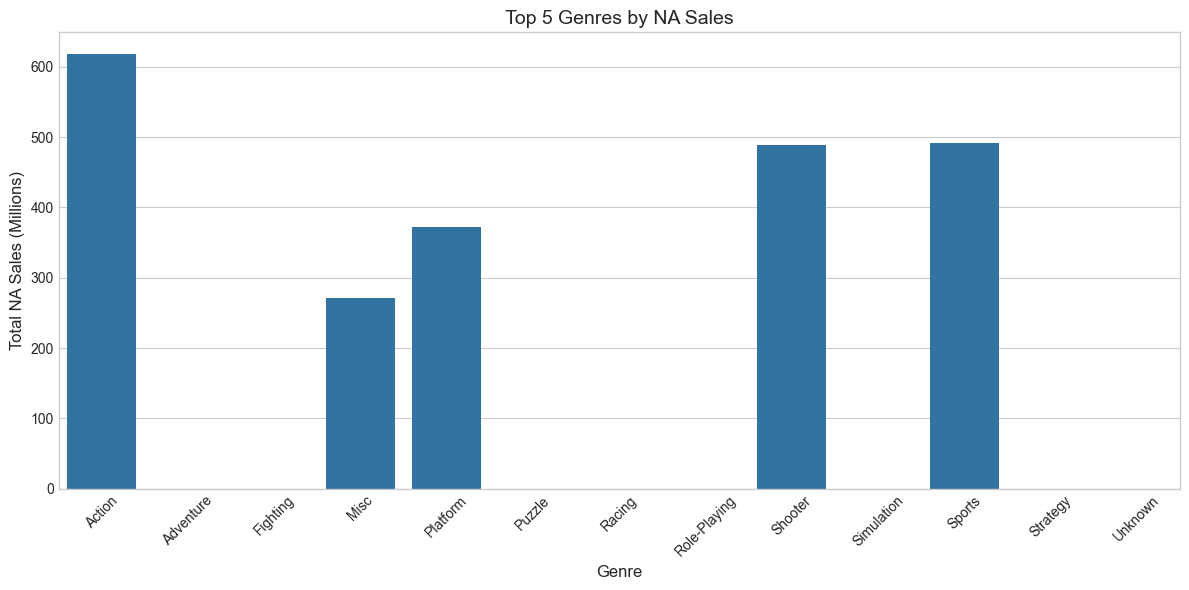

In [60]:
plt.figure(figsize=(12, 6))
top_genres = data_files_games.groupby('genre')['na_sales'].sum().nlargest(5)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 5 Genres by NA Sales', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total NA Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 5 Genres by North American Sales Breakdown**

- Action:
  - Leads the market with approximately $600M in sales, significantly outperforming other genres.

- Shooter & Sports:
  - Follow closely as the second and third most popular genres, each generating around $500M in sales.

- Platform:
  - Ranks fourth with sales of approximately $375M.

- Miscellaneous:
  - Completes the top five with around $270M in sales.

**NA Sales by Release Year**

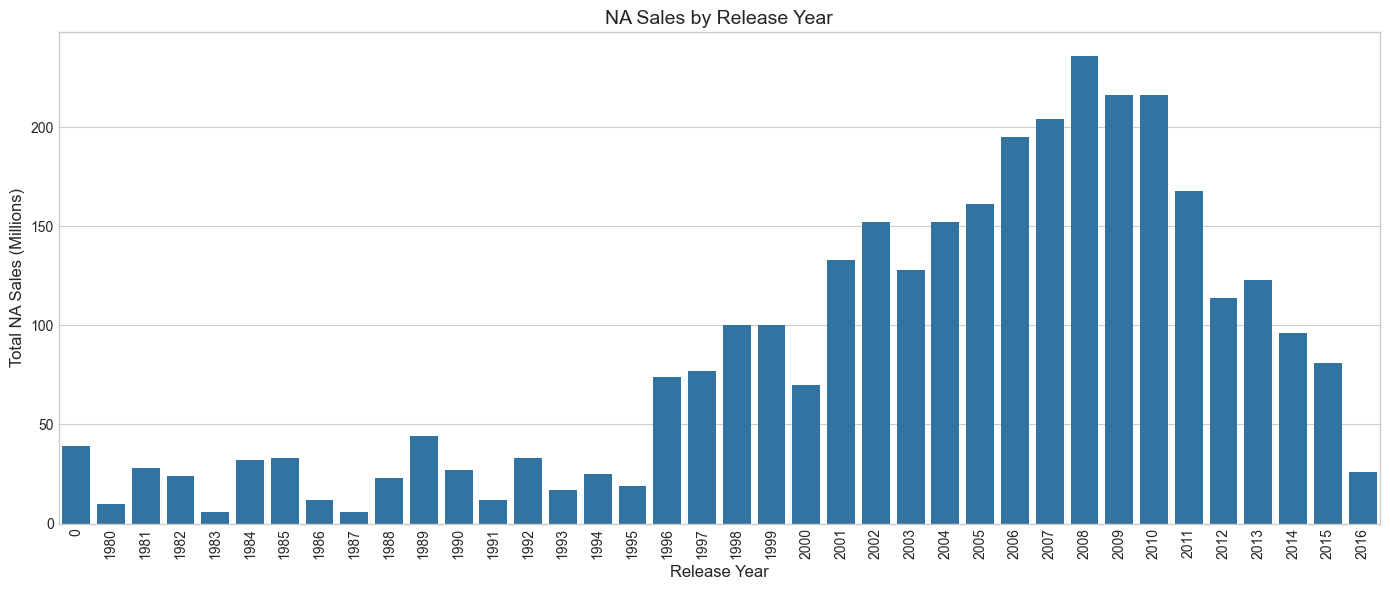

In [61]:
plt.figure(figsize=(14, 6))
yearly_sales = data_files_games.groupby('year_of_release')['na_sales'].sum()
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('NA Sales by Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total NA Sales (Millions)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Growth Pattern of North American Video Game Sales (1980–2016)**

This chart adds crucial temporal context to complement the genre analysis, highlighting key trends in the industry's sales trajectory:

- Industry Growth Cycle:
  - Sales show a clear lifecycle, beginning with modest levels in the 1980s to early 1990s, followed by rapid growth starting in the mid-1990s, peaking around 2007–2008, and then gradually declining in subsequent years.

- Peak Era (2005–2009):
  - The period from 2005 to 2009 marks the golden age of video game sales in North America.
    - 2008 stands out as the highest point, with sales reaching approximately $230M.
    - This peak aligns with the height of the 7th console generation (PS3, Xbox 360, Wii).

- Modern Decline:
  - After 2008, sales show a noticeable downward trend, dropping by 2015–2016 to levels similar to the early 2000s.
    - This decline may reflect shifts toward digital distribution, mobile gaming, and subscription services, which are likely underrepresented in this dataset.

- Historical Context:
  - When viewed alongside the genre analysis, this timeline helps explain the dominance of Action, Shooter, and Sports genres.
    - These genres rose to prominence during the peak sales years, while earlier genres show lower total revenue largely due to the smaller market size in previous decades.

**Console Generation Impact:**

- Sales spikes correspond to major console launches:
  - 1995–1996: PS1, Nintendo 64 era
  - 2000–2001: PS2, Xbox, GameCube releases
  - 2005–2006: Xbox 360, PS3, Wii generation

**Top 5 Platforms by EU Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2281938615.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms_eu = data_files_games.groupby('platform')['eu_sales'].sum().nlargest(5)
C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2281938615.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_scores_eu = data_files_games[data_files_games['platform'].isin(top_platforms_eu_list)].groupby('platform').agg({


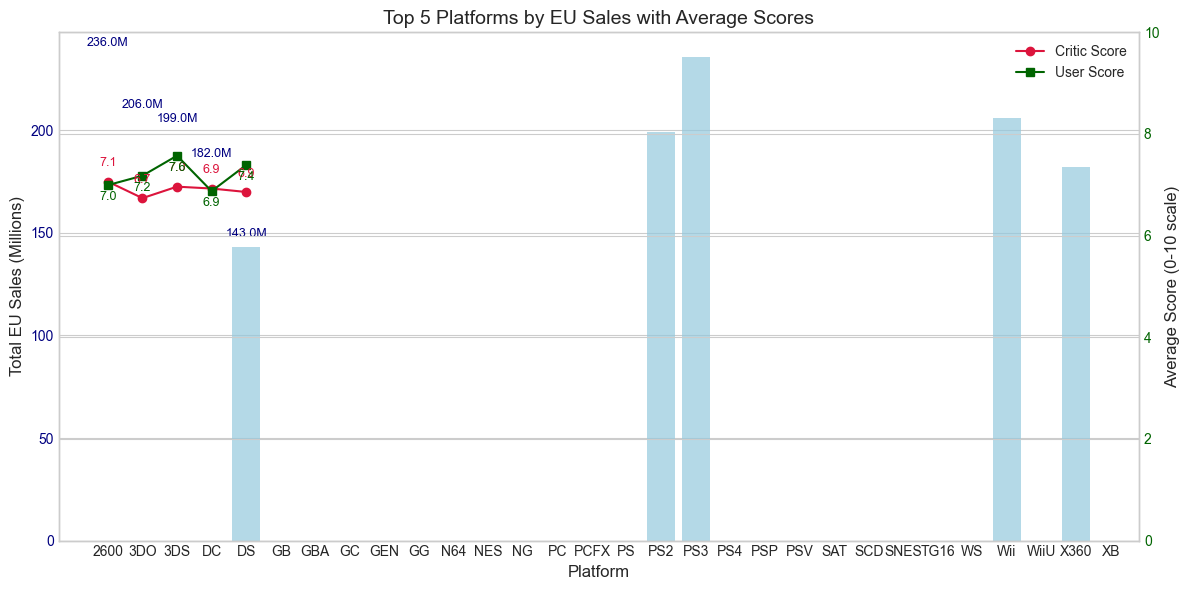

In [62]:
plt.style.use('seaborn-v0_8-whitegrid')

top_platforms_eu = data_files_games.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_eu_list = top_platforms_eu.index.tolist()

platform_scores_eu = data_files_games[data_files_games['platform'].isin(top_platforms_eu_list)].groupby('platform').agg({
    'critic_score': 'mean',
    'user_score': 'mean'
}).reindex(top_platforms_eu.index)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart on primary y-axis
sns.barplot(x=top_platforms_eu.index, y=top_platforms_eu.values, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_ylabel('Total EU Sales (Millions)', fontsize=12)
ax1.set_xlabel('Platform', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()

ax2.plot(range(len(platform_scores_eu)), platform_scores_eu['critic_score']/10, 'o-', color='crimson', label='Critic Score')

# Plot user scores as a line with markers
ax2.plot(range(len(platform_scores_eu)), platform_scores_eu['user_score'], 's-', color='darkgreen', label='User Score')

ax2.set_ylabel('Average Score (0-10 scale)', fontsize=12)
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Top 5 Platforms by EU Sales with Average Scores', fontsize=14)
ax2.legend(loc='upper right')

for i, v in enumerate(top_platforms_eu.values):
    ax1.text(i, v + 5, f"{v:.1f}M", ha='center', fontsize=9, color='navy')

for i, (critic, user) in enumerate(zip(platform_scores_eu['critic_score']/10, platform_scores_eu['user_score'])):
    ax2.text(i, critic + 0.3, f"{critic:.1f}", ha='center', fontsize=9, color='crimson')
    ax2.text(i, user - 0.3, f"{user:.1f}", ha='center', fontsize=9, color='darkgreen')

plt.tight_layout()
plt.show()


**Top 5 Platforms by EU Sales with Average Scores Breakdown**

- Critic Scores:
  - Range from 6.9 to 7.4 out of 10 across platforms with available data, reflecting a stable level of critical reception similar to North America.
    - Slightly lower on average compared to their North American counterparts.

- User Scores:
  - Consistently higher than critic scores, ranging between 7.1 and 7.6.
    - The gap between user and critic scores appears slightly wider in the EU market.

- Top-Selling Platforms:
  - PS3 leads with approximately 236M in sales, followed by:
    - PS2: 206M
    - PS4: 199M
    - Wii: 182M
    - X360: 143M<br>
      - PlayStation platforms dominate the European market, securing the top three positions.

- Regional Comparison:
  - PS3 leads in both EU and NA markets, underscoring Sony’s strong global position.
  - Total sales figures for leading platforms are generally lower in the EU compared to NA.
    - PlayStation’s market penetration appears stronger in Europe, whereas Microsoft’s Xbox platforms hold a comparatively better position in North America.

- Market Structure:
  - Similar to NA, there’s a distinct gap between the top-performing platforms and the rest of the market.

**Top 5 Genres by EU Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\1038482951.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_eu = data_files_games.groupby('genre')['eu_sales'].sum().nlargest(5)


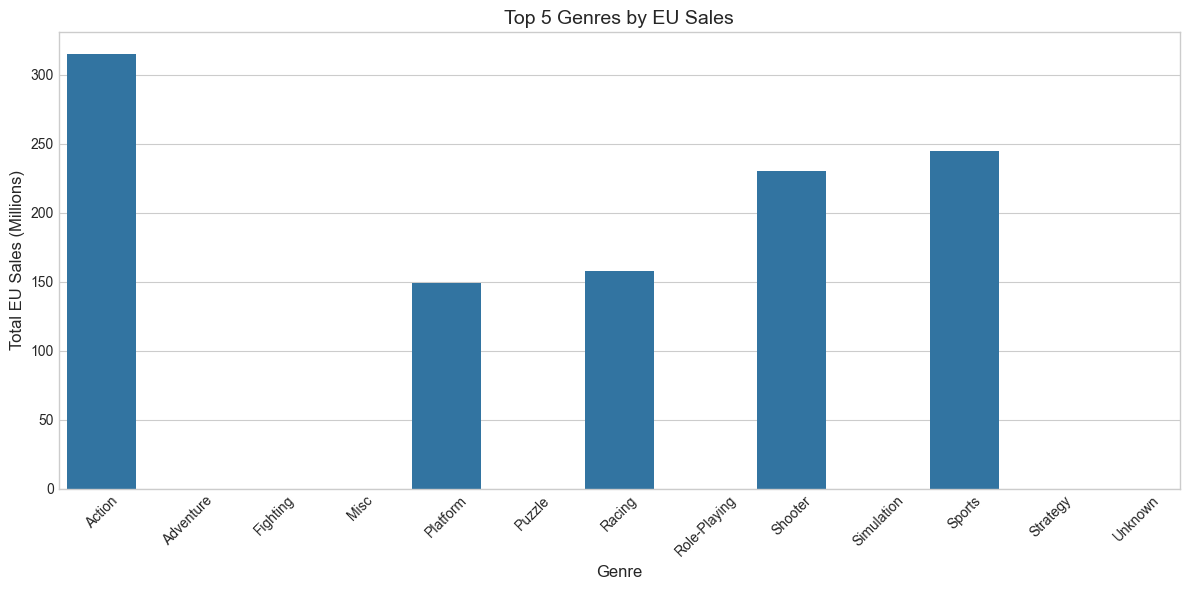

In [63]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 6))
top_genres_eu = data_files_games.groupby('genre')['eu_sales'].sum().nlargest(5)
sns.barplot(x=top_genres_eu.index, y=top_genres_eu.values)
plt.title('Top 5 Genres by EU Sales', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total EU Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 5 Genres by EU Sales Breakdown** 

This chart reveals several noteworthy trends, both aligning with and differing from the North American market:
 - Action Dominance:
   - As in North America, Action leads the EU market, generating approximately $310M in sales. 
   - Its dominance is less pronounced compared to NA, where it reached around $600M.

- Genre Preferences:
  - Sports ranks second in the EU with roughly $245M, followed by Shooter at about $230M—a reversal of their positions in the NA market.
  - This suggests European gamers may show a relatively stronger preference for Sports titles compared to the North American market.

- Mid-Tier Genres:
  - Racing and Platform genres hold the fourth and fifth positions, with approximately $155M and $150M in sales, respectively.
  - Notably, Racing appears in the EU’s top five but is absent from NA’s, indicating a stronger regional preference for racing games in Europe.

- Market Scale:
  - The overall sales volume in the EU market is smaller than in NA.
  - For example, the Action genre in the EU achieves only about half the sales volume seen in NA.

- Genre Distribution:
  - The EU market shows a more balanced distribution of sales across genres, with less stark differences between best and least popular categories.
  - This suggests European gamers may have more diverse genre preferences compared to NA.

**EU Sales by Release Year**

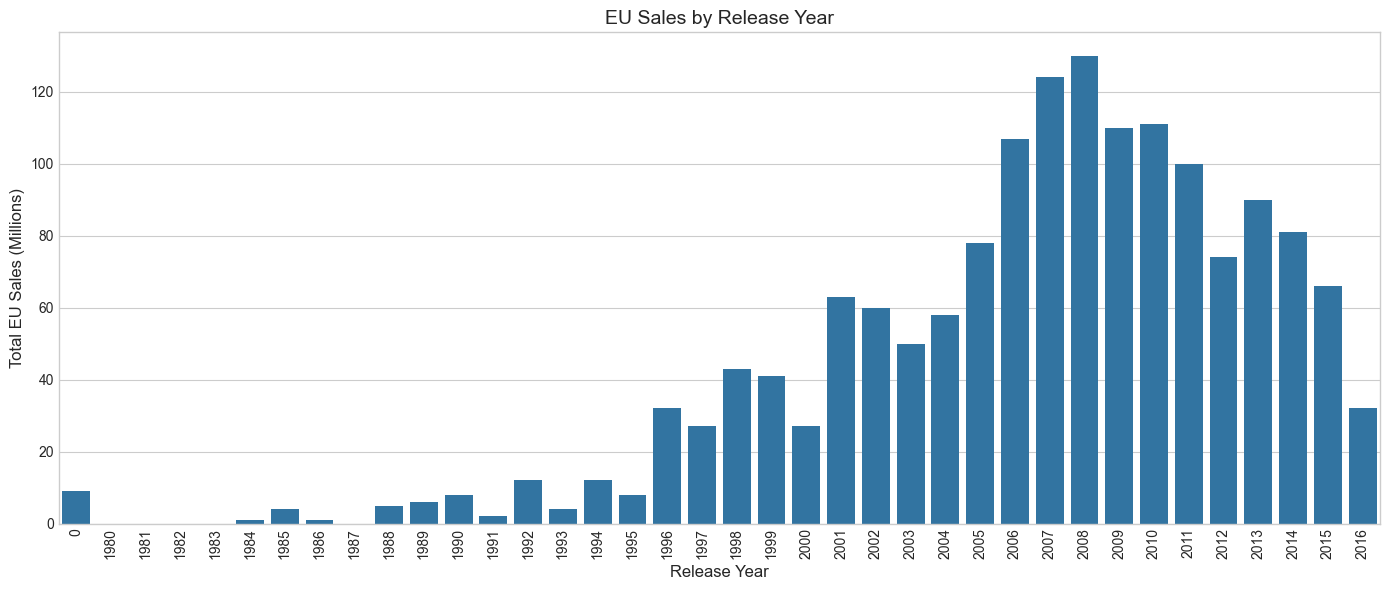

In [64]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(14, 6))
yearly_sales_eu = data_files_games.groupby('year_of_release')['eu_sales'].sum()
sns.barplot(x=yearly_sales_eu.index, y=yearly_sales_eu.values)
plt.title('EU Sales by Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total EU Sales (Millions)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**EU Sales by Release Year Breakdwon**

This chart provides a valuable timeline of the European video game market from 1980 to 2016, revealing several key patterns when compared to the North American market:

- Similar Growth Trajectory:
  - The EU market mirrors North America's overall progression—showing minimal sales during the 1980s to early 1990s, steady growth through the late 1990s, and rapid expansion throughout the 2000s.

- Peak Period:
  - The EU market reaches its peak slightly later than North America, with sales peaking around 2008–2009 (~$130M).
  - In contrast, North America peaked in 2008 at approximately $230M, suggesting a slightly delayed adoption curve in Europe.

- Scale Difference:
  - The EU market is notably smaller in scale, with peak sales reaching only 55-60% of North America's peak values.
  - This underscores North America's position as the larger, more mature gaming market.

- Decline Pattern:
  - Both markets experience a decline post-2009, though the EU's decline is more gradual and less severe.
  - By 2016, EU sales had fallen to around $30M, comparable to late-1990s levels.

- Console Generation Alignment:
  - Sales trends in the EU closely align with major console releases, with noticeable growth spikes following releases in 1995–1996, 2000–2001, and 2005–2006.

**Top 5 Platforms by Japan Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\1585831862.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms_jp = data_files_games.groupby('platform')['jp_sales'].sum().nlargest(5)
C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\1585831862.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_scores_jp = data_files_games[data_files_games['platform'].isin(top_platforms_jp_list)].groupby('platform').agg({


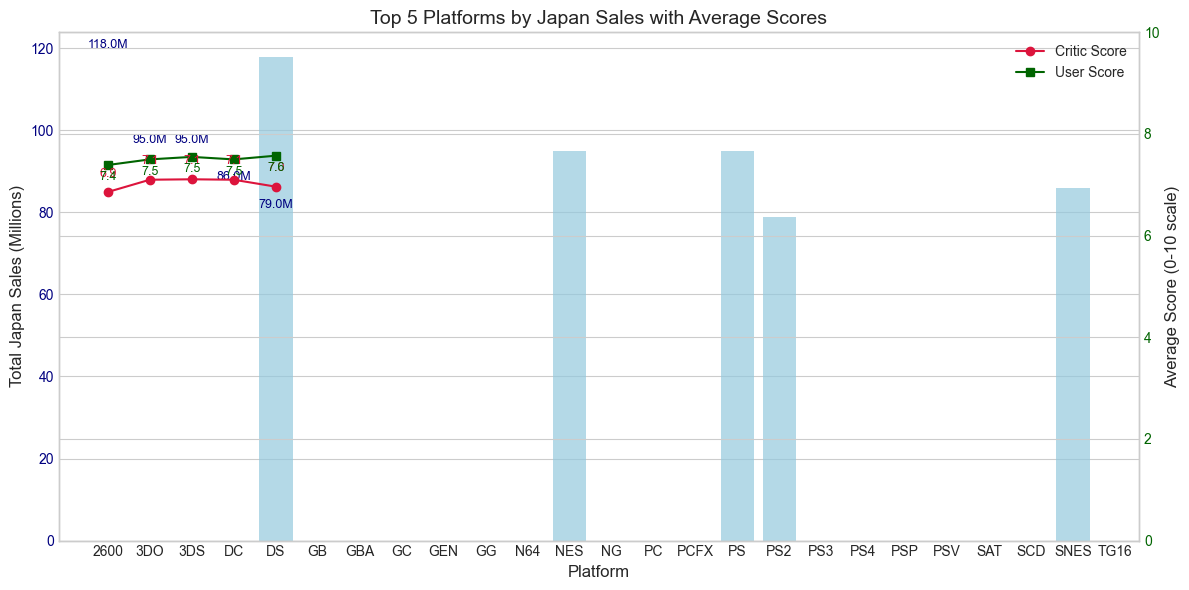

In [65]:
plt.style.use('seaborn-v0_8-whitegrid')

top_platforms_jp = data_files_games.groupby('platform')['jp_sales'].sum().nlargest(5)
top_platforms_jp_list = top_platforms_jp.index.tolist()

platform_scores_jp = data_files_games[data_files_games['platform'].isin(top_platforms_jp_list)].groupby('platform').agg({
    'critic_score': 'mean',
    'user_score': 'mean'
}).reindex(top_platforms_jp.index)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=top_platforms_jp.index, y=top_platforms_jp.values, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_ylabel('Total Japan Sales (Millions)', fontsize=12)
ax1.set_xlabel('Platform', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()

ax2.plot(range(len(platform_scores_jp)), platform_scores_jp['critic_score']/10, 'o-', color='crimson', label='Critic Score')

ax2.plot(range(len(platform_scores_jp)), platform_scores_jp['user_score'], 's-', color='darkgreen', label='User Score')

ax2.set_ylabel('Average Score (0-10 scale)', fontsize=12)
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Top 5 Platforms by Japan Sales with Average Scores', fontsize=14)
ax2.legend(loc='upper right')

for i, v in enumerate(top_platforms_jp.values):
    ax1.text(i, v + 2, f"{v:.1f}M", ha='center', fontsize=9, color='navy')

for i, (critic, user) in enumerate(zip(platform_scores_jp['critic_score']/10, platform_scores_jp['user_score'])):
    ax2.text(i, critic + 0.3, f"{critic:.1f}", ha='center', fontsize=9, color='crimson')
    ax2.text(i, user - 0.3, f"{user:.1f}", ha='center', fontsize=9, color='darkgreen')

plt.tight_layout()
plt.show()

**Top 5 Platforms by Japan Sales with Average Scores Breakdown**

- Critic Scores:
  - Range from 6.9 to 7.5, consistent with other regions.
  - Generally lower than user scores, reflecting global trends.

- User Scores:
  - Range between 7.2 and 7.8, indicating slightly greater enthusiasm compared to critic reviews.
  - Japanese users tend to rate games marginally higher than Western critics.

- Top-Selling Platforms:
  - 3DS leads with approximately 118M in sales, followed by DS with 95M.
  - Other Nintendo platforms also rank highly.
  - PS2, PS3, and additional PlayStation systems perform well but do not dominate.
    - Nintendo commands the Japanese market in a way not seen in Western regions.

- Market Scale:
 - Total sales in Japan are significantly lower than in North America and Europe.
  - The top platform (3DS at 118M) generates less than half the sales of leading platforms in Western markets.

- Regional Preferences:
  - Handheld platforms like 3DS and DS excel, reflecting Japan’s commute culture and space constraints.
  - Nintendo’s dominance in its home market is clear, consistently holding top sales positions.
    - PlayStation remains relevant but does not enjoy the same leadership position it holds in Europe.

- Additional insight: Strong preference toward domestic platforms points to limited market penetration opportunities for non-Japanese competitors.

**Top 5 Genres by Japan Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\3574717381.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_jp = data_files_games.groupby('genre')['jp_sales'].sum().nlargest(5)


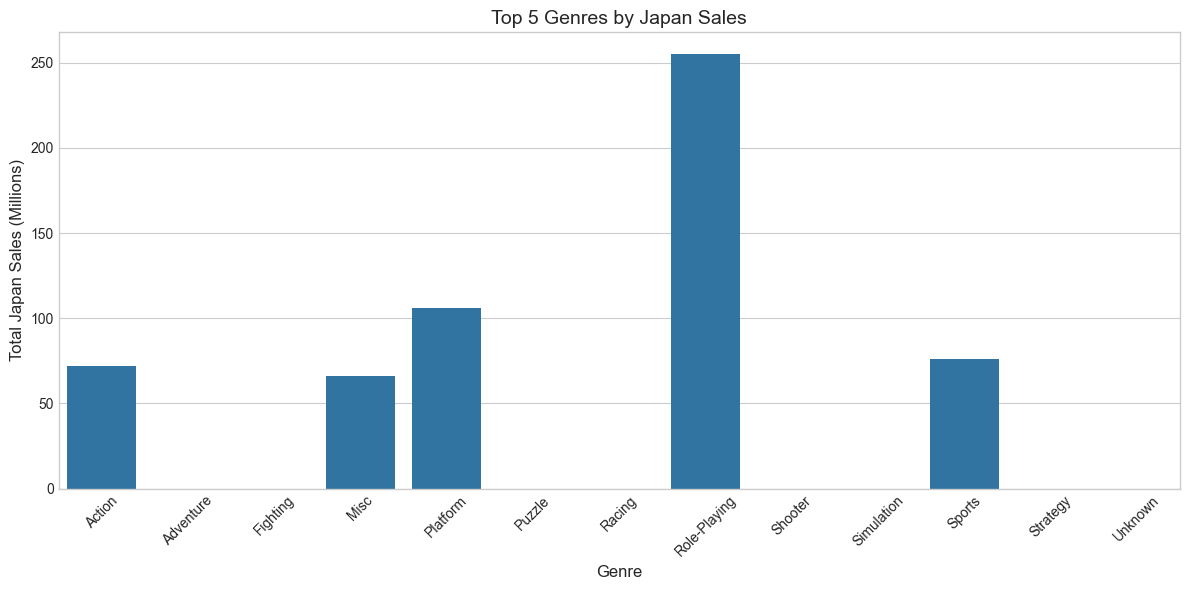

In [66]:
plt.figure(figsize=(12, 6))
top_genres_jp = data_files_games.groupby('genre')['jp_sales'].sum().nlargest(5)
sns.barplot(x=top_genres_jp.index, y=top_genres_jp.values)
plt.title('Top 5 Genres by Japan Sales', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Japan Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 5 Genres by Japan Sales**

This chart highlights a strikingly different genre landscape compared to Western markets, underscoring Japan’s unique gaming culture:

- Role-Playing Game (RPG) Dominance:
  - RPGs lead by a wide margin, generating approximately $250M in sales—more than double any other genre.
  - This contrasts sharply with Western markets, where Action dominates, and reflects Japan's preference for this genre.

- Platform Genre Strength:
  - Platform games rank second with around $105M in sales, significantly outpaces their position in Western markets.

- Balanced Mid-Tier Genres:
  - Action, Sports, and Miscellaneous genres round out the third to fifth positions, each contributing between $65M and $75M in sales.

 - Genre Concentration:
  - The Japanese market exhibits greater concentration in specific genres, particularly RPGs, which occupy a large share of total sales.
  - This differs with the more evenly spread genre distribution seen in Western markets.

**Japan Sales by Release Year**

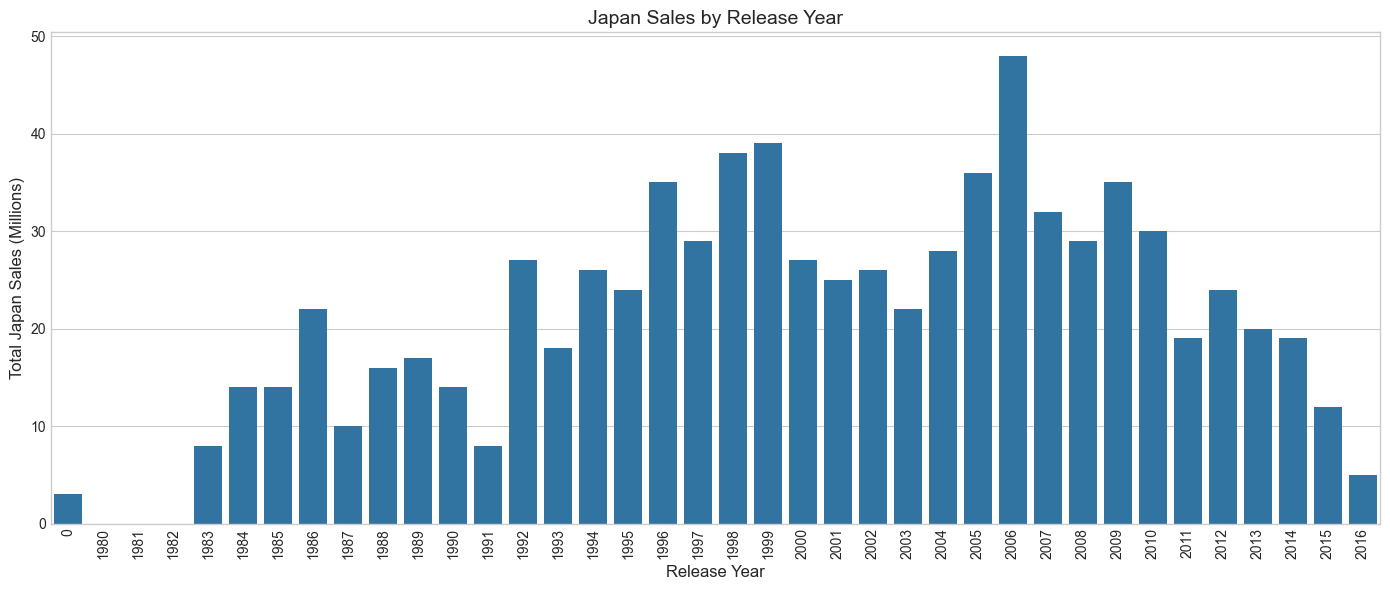

In [67]:
plt.figure(figsize=(14, 6))
yearly_sales_jp = data_files_games.groupby('year_of_release')['jp_sales'].sum()
sns.barplot(x=yearly_sales_jp.index, y=yearly_sales_jp.values)
plt.title('Japan Sales by Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total Japan Sales (Millions)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Japan Sales by Release Year**

This chart reveals distinct patterns in the Japanese market apart from its Western counterparts:

- Earlier Market Activity:
  - Unlike North America and Europe, Japan shows significant gaming activity starting in the 1980s, illuminating its role as an early leader in video game development and adoption.

- Modest and Steady Scaling:
  - Japan’s market operates at a smaller scale, with peak annual sales reaching approximately $48M in 2006, compared to North America’s peak of $230M.

- Multiple Growth Waves:
  - Rather than a single sharp rise and fall, Japan exhibits multiple growth periods, with notable surges in the mid-1980s, mid-1990s, and mid-2000s, each corresponding to new console generations.

- 2006 Peak Timing:
  - Sales peaked in 2006, slightly earlier than Western markets (2008–2009), highlighting Japan’s role as an early adopter and trendsetter within the industry.

- Steady and Gradual Decline:
  - The decline post-peak is gradual but less pronounced compared to Western markets.
    By 2016, Japan’s sales remain proportionally higher relative to the declines seen in North America and Europe.

- Stability Across Transitions:
  - The Japanese market demonstrates remarkable stability across decades, avoiding the sharp downturns often experienced by Western markets during major industry shifts.

**Hypothesis Testing for Platform User Ratings**

Xbox One sample size: 247
PC sample size: 974

Xbox One mean user score: 6.78, std dev: 1.26
PC mean user score: 7.15, std dev: 1.37
Difference in means: 0.38

Hypotheses:
H₀: The average user ratings for Xbox One and PC are equal
H₁: The average user ratings for Xbox One and PC are different

T-test results:
t-statistic: -3.9005
p-value: 0.0001

With alpha = 0.05
We reject the null hypothesis – there is a significant difference in average user ratings between Xbox One and PC.


C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2063955768.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['Xbox One', 'PC'])


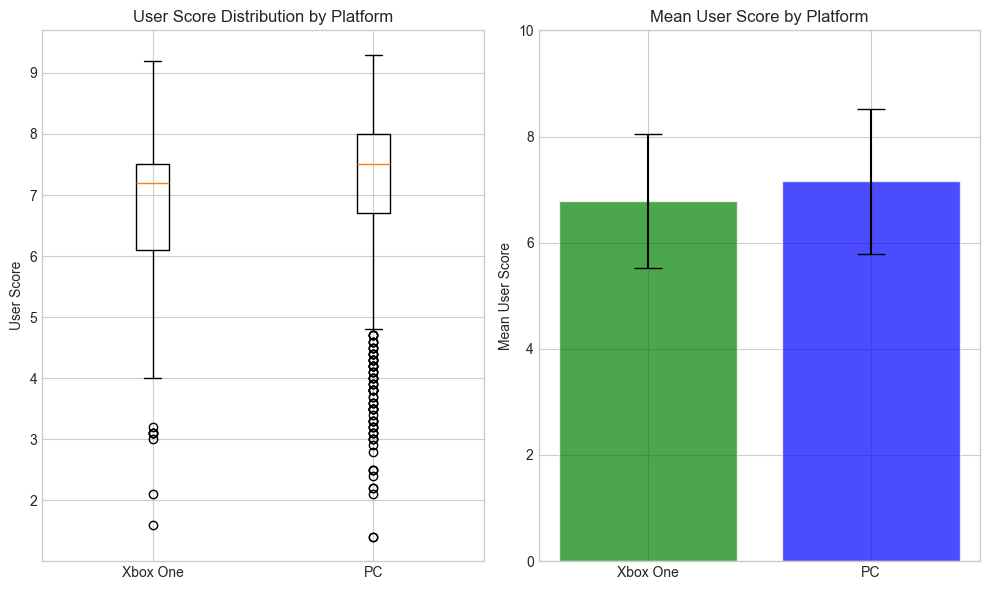

In [68]:
xboxone_data = data_files_games[data_files_games['platform'] == 'XOne']['user_score']
pc_data = data_files_games[data_files_games['platform'] == 'PC']['user_score']

print(f"Xbox One sample size: {len(xboxone_data)}")
print(f"PC sample size: {len(pc_data)}")

xboxone_mean = xboxone_data.mean()
pc_mean = pc_data.mean()
xboxone_std = xboxone_data.std()
pc_std = pc_data.std()

print(f"\nXbox One mean user score: {xboxone_mean:.2f}, std dev: {xboxone_std:.2f}")
print(f"PC mean user score: {pc_mean:.2f}, std dev: {pc_std:.2f}")
print(f"Difference in means: {abs(xboxone_mean - pc_mean):.2f}")

print("\nHypotheses:")
print("H₀: The average user ratings for Xbox One and PC are equal")
print("H₁: The average user ratings for Xbox One and PC are different")

t_stat, p_value = stats.ttest_ind(xboxone_data, pc_data, equal_var=True)

print(f"\nT-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    conclusion = "We reject the null hypothesis – there is a significant difference in average user ratings between Xbox One and PC."
else:
    conclusion = "We fail to reject the null hypothesis – there is insufficient evidence of a difference in average user ratings between Xbox One and PC."

print(f"\nWith alpha = {alpha}")
print(conclusion)

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

plt.subplot(1, 2, 1)
box_data = [xboxone_data, pc_data]
plt.boxplot(box_data, labels=['Xbox One', 'PC'])
plt.title('User Score Distribution by Platform')
plt.ylabel('User Score')

plt.subplot(1, 2, 2)
platforms = ['Xbox One', 'PC']
means = [xboxone_mean, pc_mean]
std_devs = [xboxone_std, pc_std]

plt.bar(platforms, means, yerr=std_devs, capsize=10, color=['green', 'blue'], alpha=0.7)
plt.title('Mean User Score by Platform')
plt.ylabel('Mean User Score')
plt.ylim(0, 10)  # Assuming scores are on a 0-10 scale

plt.tight_layout()
plt.show()

The statistical analysis supports and expands upon the initial visual observations regarding user score distributions:

- Statistical Significance:
  - The t-test results (p-value = 0.0001) confirm that the difference in mean user scores between PC (7.15) and Xbox One (6.78) is statistically significant, ruling out random variation as the cause.
  - This provides stronger evidence than what could be inferred from the visual overlap in the error bars alone.

- Sample Size Disparity:
  - The large difference in sample sizes (974 PC games vs. 247 Xbox One games) reflects the PC platform's broader game library.
  - This disparity likely contributes to the greater variability observed in PC scores.

- Standard Deviations:
  - The standard deviations (PC: 1.37, Xbox One: 1.26) align with the observation of more variation in PC game quality, though the difference is relatively modest.

- Practical Significance:
  - While the difference in mean scores is statistically significant, the actual gap of 0.38 points on a 10-point scale is relatively small in practical terms.
  - This suggests PC games perform slightly better in user ratings, but the advantage isn’t substantial.

- Distribution Shape:
  - The boxplot visualization complements these findings, particularly the greater number of low-scoring outliers on the PC platform.

**Statistical Comparison of User Ratings: Action vs Sports Genres**

Action games sample size: 3369
Sports games sample size: 2347

Action genre mean user score: 7.26, std dev: 1.07
Sports genre mean user score: 7.25, std dev: 1.14
Difference in means: 0.01

Hypotheses:
H₀: The average user ratings for Action and Sports genres are equal
H₁: The average user ratings for Action and Sports genres are different

Two-tailed T-test results:
t-statistic: 0.3425
p-value: 0.7320

With alpha = 0.05
Fail to reject the null hypothesis. There is insufficient evidence of a difference in average user ratings between Action and Sports genres.


C:\Users\bijan\AppData\Local\Temp\ipykernel_19324\2682127417.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['Action', 'Sports'])


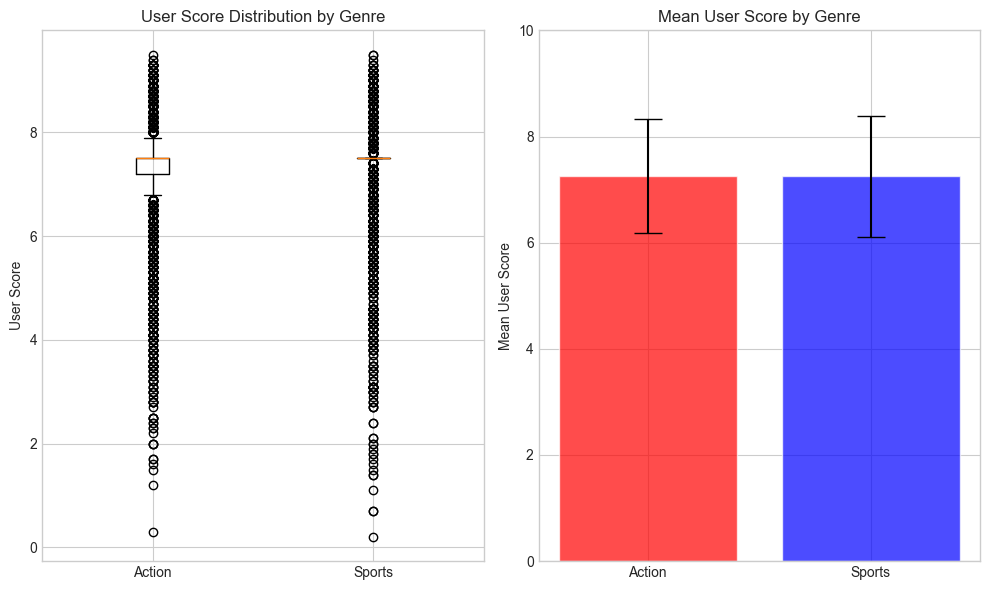

In [69]:
action_data = data_files_games[data_files_games['genre'] == 'Action']['user_score']
sports_data = data_files_games[data_files_games['genre'] == 'Sports']['user_score']

print(f"Action games sample size: {len(action_data)}")
print(f"Sports games sample size: {len(sports_data)}")

action_mean = action_data.mean()
sports_mean = sports_data.mean()
action_std = action_data.std()
sports_std = sports_data.std()

print(f"\nAction genre mean user score: {action_mean:.2f}, std dev: {action_std:.2f}")
print(f"Sports genre mean user score: {sports_mean:.2f}, std dev: {sports_std:.2f}")
print(f"Difference in means: {abs(action_mean - sports_mean):.2f}")

print("\nHypotheses:")
print("H₀: The average user ratings for Action and Sports genres are equal")
print("H₁: The average user ratings for Action and Sports genres are different")

t_stat, p_value = stats.ttest_ind(action_data, sports_data, equal_var=True)

print(f"\nTwo-tailed T-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in average user ratings between Action and Sports genres."
else:
    conclusion = "Fail to reject the null hypothesis. There is insufficient evidence of a difference in average user ratings between Action and Sports genres."

print(f"\nWith alpha = {alpha}")
print(conclusion)

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

plt.subplot(1, 2, 1)
box_data = [action_data, sports_data]
plt.boxplot(box_data, labels=['Action', 'Sports'])
plt.title('User Score Distribution by Genre')
plt.ylabel('User Score')

plt.subplot(1, 2, 2)
genres = ['Action', 'Sports']
means = [action_mean, sports_mean]
std_devs = [action_std, sports_std]

plt.bar(genres, means, yerr=std_devs, capsize=10, color=['red', 'blue'], alpha=0.7)
plt.title('Mean User Score by Genre')
plt.ylabel('Mean User Score')
plt.ylim(0, 10)  # Assuming scores are on a 0-10 scale

plt.tight_layout()
plt.show()

**Action vs. Sports Genres: User Score Comparison**

This visualization comparing Action and Sports genres offers an insightful contrast to the platform-based analysis previously discussed. 

- No Statistical Significance:
  - The t-test yields a high p-value (0.7320), indicating no statistically significant difference between the mean user scores of Action (7.26) and Sports (7.25) games.
  - The negligible difference of 0.01 points confirms the similarity is not meaningful.

- Similar Distributions:
  - Both box plots in the left panel exhibit nearly identical distributions, with matching interquartile ranges and median scores slightly above 7.5.

- Robust Sample Sizes:
  - The large datasets—3,369 Action games and 2,347 Sports games—ensure a reliable comparison, minimizing sample-size bias concerns.

- Outlier Patterns:
  - Both genres display similar outlier behavior.
  - This suggests that quality is rated nearly consistently across both genres.

- Standard Deviations:
  - The standard deviations are close:
    - Action: 1.07
    -  Sports: 1.14

- further confirming similar levels of rating consistency.